# Load Packages and Files

In [1]:
from agent import *
from interact import *
from inspection import *
from param import *
import pickle
import operator
import os
import matplotlib.cm as cm
import matplotlib
matplotlib.rc_file_defaults()
import antropy as ant
from scipy.stats import entropy
from statistics import variance
from plotting import *
cwd = os.getcwd()+ '\data\yuechen'

In [2]:
########### Generate file names ########## 
# how many runs per condition?
runs = 20
# where do you want to start run?
q_run = input('where do you want to start run? ')
start = int(q_run)
# all simulation conditions
params = set_parameter()

where do you want to start run?  0
Enter ToM conditions Separate by SPACE:  1 0
Enter Conformity Bias Conditions Separate by SPACE:  0.2 0.5 0.8
Enter Network Conditions Separate by SPACE:  0
Enter Start Run Index:  0
Enter End Run Index:  20


In [3]:
cwd = os.getcwd()+ '\data\yuechen'
fileNum = len(params)
fileList = [None] * fileNum
fileNames = [None] * fileNum

for i in range(fileNum):
    '''
    fileList: a list of variable names each point to a file containing 1 simulated run
    fileNames: a list of actual pickle file names stored somewhere 
    '''
    agent_ratio, bias, net_type, run = params[i]
    fileList[i] = f"{agent_ratio.astype(int)}{(10*round(bias,1)).astype(int)}{net_type.astype(int)}n{run.astype(int)}"
    fileNames[i] = f"ratio_{agent_ratio}_bias_{bias}_net_{net_type.astype(int)}_run_{run.astype(int)}.pkl"


########### Load all pickled original files ########## 

# import pickled data files 
for i in range(fileNum):
    filename = fileNames[i]
    var_names = ['record', 'CN', 'IN', 'agents', 'network'] 
    variables = []
    
    for var_name in var_names:
        variables.append(f"{var_name}{fileList[i]}")
    
    filepath = os.path.join(cwd, filename)
    # Load pickled file
    with open(filepath, 'rb') as file:
        pickled_data = pickle.load(file)
    
    # Assign dictionary elements to variables dynamically using itemgetter
    itemgetter_func = operator.itemgetter(*var_names)
    values = itemgetter_func(pickled_data)
    
    for x in range(5):
       exec(f"{variables[x]} = values[x]")

    exec(f'{variables[0]}["actualGroup"] = ({variables[0]}["senderGroup"]*5).astype(int)') 

########### Create lists of runs for all conditions ########## 
conditions = input('How many conditions do you have? ')
for i in range(int(conditions)):
    exec(f"{'list'}{fileList[i*runs][0:3]} = {fileList[i*runs:(i+1)*runs]}")
    
    
########## Model fixed setting
steps = 5000
mus = np.arange(0.1, 1, 0.2)
mus = np.round(mus,2)
mus_str = ["".join(item) for item in mus.astype(str)]
sds = 0.1
k = 5
N = 50

How many conditions do you have?  6


In [4]:
q_network = input('Which network do you want to generate direct measrures? 0 fully connected, 2 small-world: ')

if q_network == '0':
    # all measures for fully-connected network
    #totalList = ['list020','list050', 'list080','list120','list150','list180']
    totalList = ['list080','list050','list020','list120', 'list150', 'list180']
elif q_network == '2':
    # all measures for small world network
    totalList = ['list082', 'list052', 'list022', 'list122', 'list152','list182']
   
   
#newList = [item[4:] for item in totalList]

Which network do you want to generate direct measrures? 0 fully connected, 2 small-world:  0


In [5]:
cmap = cm.get_cmap("viridis")
colors2 = [cmap(0.3), cmap(.83), cmap(1.2)]
# cmap(0.5), cmap(0.83), cmap(1.17)
cmap = cm.get_cmap("bwr")
colors1 = [cmap(75), cmap(.75)]
colors4 = [[cmap(0), cmap(0.2), cmap(0.4)], [cmap(0.58), cmap(0.7), cmap(1.3)]]
cmap = cm.get_cmap("Spectral")
colors3 = [cmap(0.75), cmap(75)]
colorList = [colors1, colors2, colors3]

## Load Measures

In [6]:
# set dictionary
# important! since different conditions are stored in different folders
cwd = os.getcwd()+ '\pickles_net0_run0_19_evenNorm'

In [42]:
measure_fileList = ['sub_norm_entropy.pkl', 'collect_belief_entropy.pkl', 'collect_action_entropy.pkl', 'action_sample_entropy.pkl', # direct measures
                    'CB.pkl', 'ColBelief.pkl', 'ColAction.pkl', # original measures
                    'ColBelief_IN.pkl', 'ColAction_IN.pkl', 'ColAction_ColBelief.pkl', # col to col measures
                    'IndBelief_IN.pkl', 'IndBelief_IN_avg.pkl', 'IndBelief_CN.pkl', 'IndBelief_CN_avg.pkl',
                    'inference_accuracy.pkl', 'group_harmony.pkl'] #'agree_collect.pkl'

In [59]:
for filename in measure_fileList:    
    filepath = os.path.join(cwd, filename)
    
    if filename not in  ['action_sample_entropy.pkl', 'inference_accuracy.pkl', 'group_harmony.pkl']:
        # Load pickled file
        with open(filepath, 'rb') as file:
            pickled_data = pickle.load(file)

        # turn dictionary key and value to local variable using locals()    
        for key, value in  pickled_data.items(): 
            locals()[key] = value 
            
    elif filename == 'action_sample_entropy.pkl':
        with open(filepath, 'rb') as file:
            data_action = pickle.load(file)
    elif filename == 'group_harmony.pkl':
        with open(filepath, 'rb') as file:
            harmony = pickle.load(file)
    elif filename == 'agree_collect.pkl':
        with open(filepath, 'rb') as file:
            agree_collect = pickle.load(file)
    else:
        with open(filepath, 'rb') as file:
            correct = pickle.load(file)

In [44]:
# Load pickled file
filepath = os.path.join(cwd, 'IndBelief_CB_avg.pkl')
with open(filepath, 'rb') as file:
    pickled_data = pickle.load(file)

# turn dictionary key and value to local variable using locals()    
for key, value in  pickled_data.items(): 
    locals()[key] = value 

# Load pickled file
filepath = os.path.join(cwd, 'IndBelief_CB.pkl')
with open(filepath, 'rb') as file:
    pickled_data = pickle.load(file)

# turn dictionary key and value to local variable using locals()    
for key, value in  pickled_data.items(): 
    locals()[key] = value 


# Plot

## Individual Subjective Belief Entropy

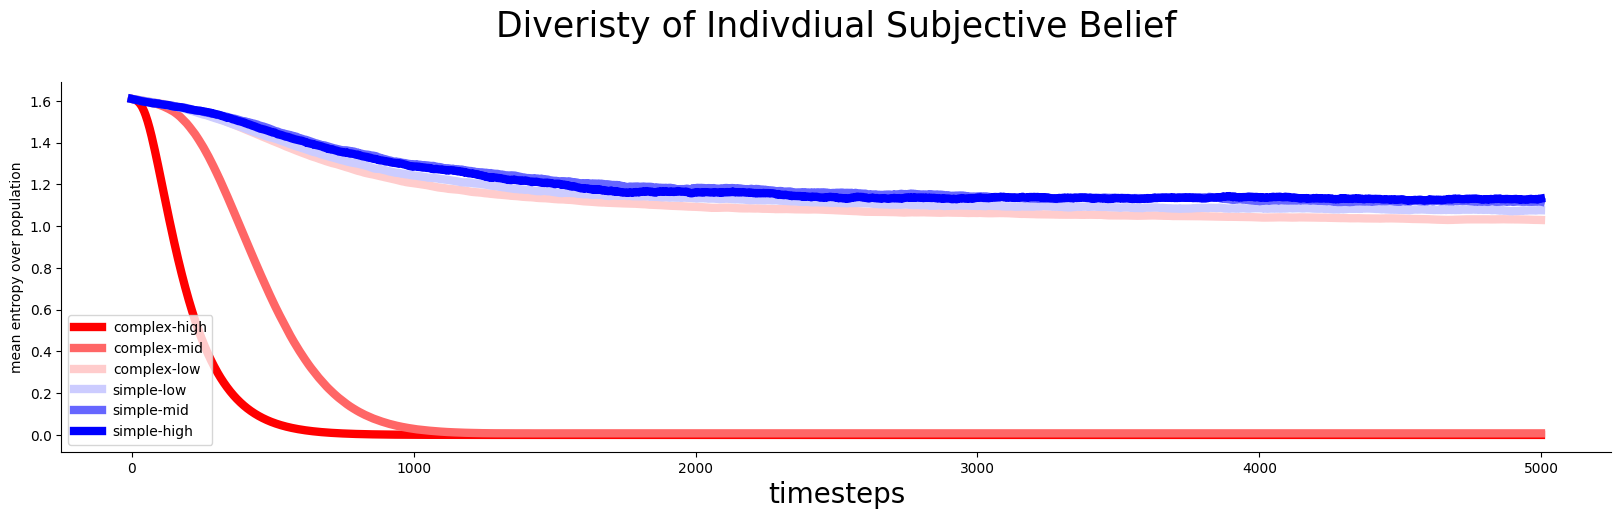

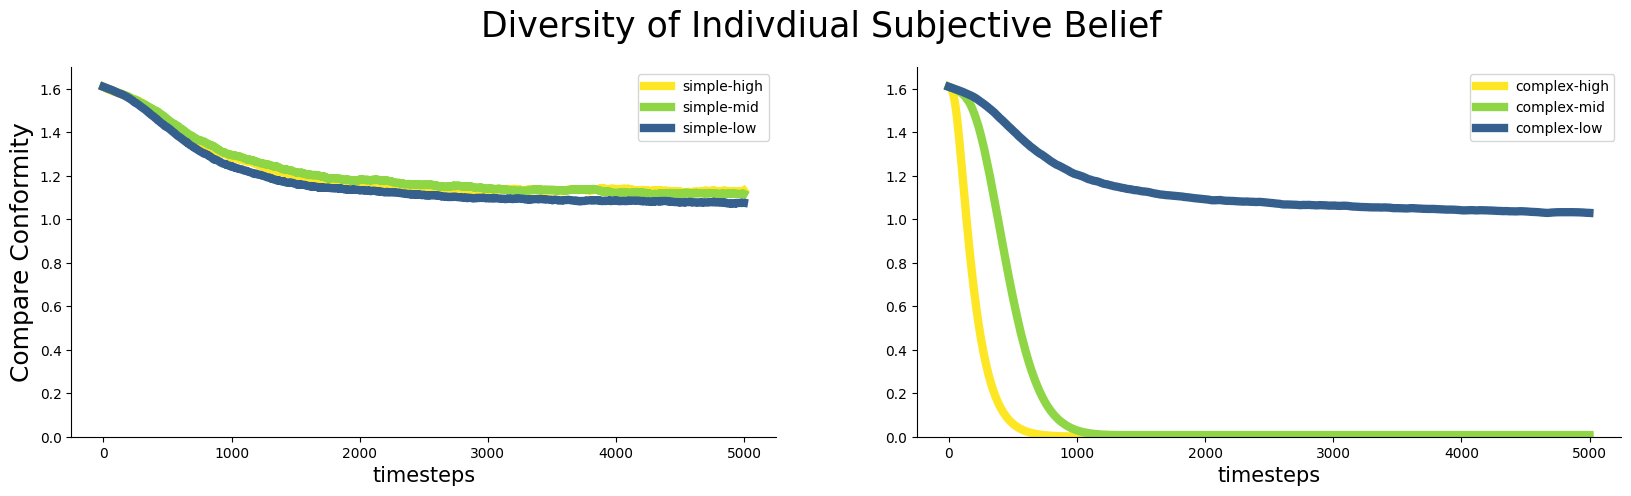

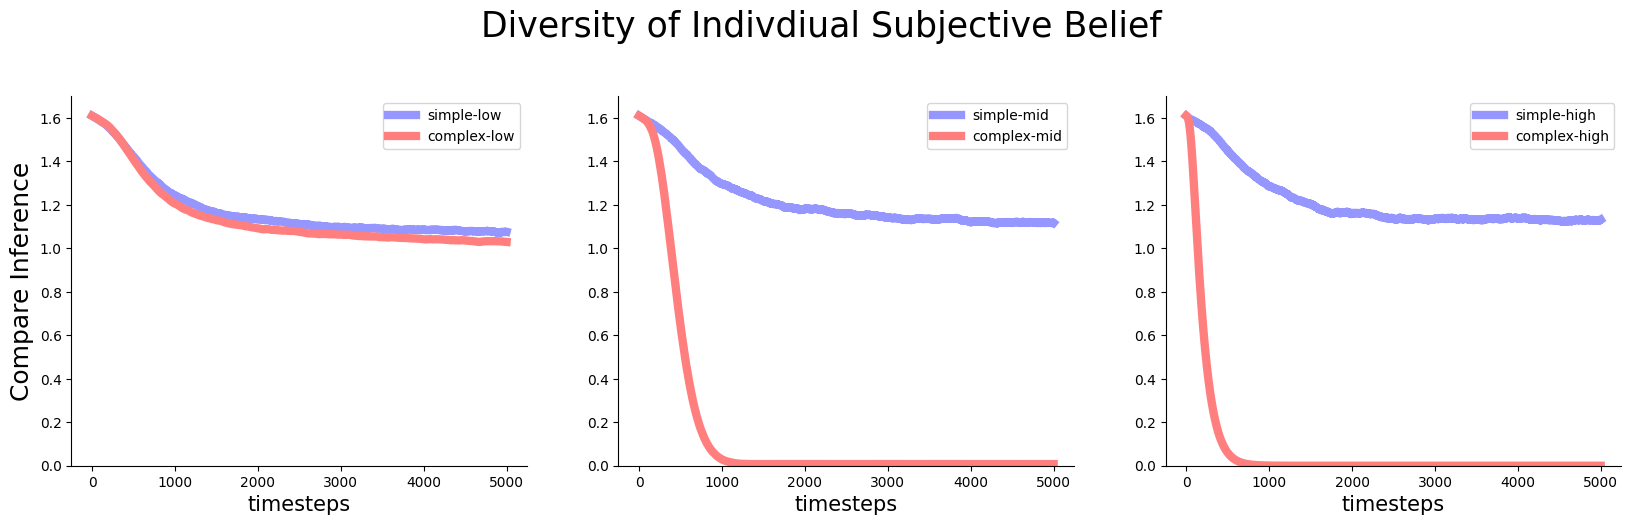

In [75]:
cmap = cm.get_cmap("bwr")

fig, ax = plt.subplots()
fig.set_figwidth(20)
plt.title("Diveristy of Indivdiual Subjective Belief", fontsize=25, y = 1.1)
plt.ylabel("mean entropy over population", fontsize = 10)
plt.xlabel("timesteps", fontsize = 20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(pd.DataFrame(np.transpose(df_ent180)).mean(axis = 1), linewidth = 6, color = cmap(1.2), alpha = 1, label = 'complex-high')
plt.plot(pd.DataFrame(np.transpose(df_ent150)).mean(axis = 1), linewidth = 6, color = cmap(.8), alpha = 1, label = 'complex-mid')
plt.plot(pd.DataFrame(np.transpose(df_ent120)).mean(axis = 1), linewidth = 6, color = cmap(.6), alpha = 1, label = 'complex-low')

plt.plot(pd.DataFrame(np.transpose(df_ent020)).mean(axis = 1), linewidth = 6, color = cmap(.4), alpha = 1, label = 'simple-low')
plt.plot(pd.DataFrame(np.transpose(df_ent050)).mean(axis = 1), linewidth = 6, color = cmap(.2), alpha = 1, label = 'simple-mid')
plt.plot(pd.DataFrame(np.transpose(df_ent080)).mean(axis = 1), linewidth = 6, color = cmap(0), alpha = 1, label = 'simple-high')

plt.legend()
plt.show()

# compare conformity
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)
fig.suptitle("Diversity of Indivdiual Subjective Belief", fontsize=25, y = 1)
ax[0].set_ylabel("Compare Conformity", fontsize = 18)
ax[0].set_xlabel("timesteps", fontsize = 15)
ax[1].set_xlabel("timesteps", fontsize = 15)

ax[1].plot(pd.DataFrame(np.transpose(df_ent180)).mean(axis = 1), linewidth = 6, color = colors2[2], alpha = 1, label = 'complex-high')
ax[1].plot(pd.DataFrame(np.transpose(df_ent150)).mean(axis = 1), linewidth = 6, color = colors2[1], alpha = 1, label = 'complex-mid')
ax[1].plot(pd.DataFrame(np.transpose(df_ent120)).mean(axis = 1), linewidth = 6, color = colors2[0], alpha = 1, label = 'complex-low')

ax[0].plot(pd.DataFrame(np.transpose(df_ent080)).mean(axis = 1), linewidth = 6, color = colors2[2], alpha = 1, label = 'simple-high')
ax[0].plot(pd.DataFrame(np.transpose(df_ent050)).mean(axis = 1), linewidth = 6, color = colors2[1], alpha = 1, label = 'simple-mid')
ax[0].plot(pd.DataFrame(np.transpose(df_ent020)).mean(axis = 1), linewidth = 6, color = colors2[0], alpha = 1, label = 'simple-low')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.legend()
    a.set_ylim(0,1.7)

plt.show()

#compare tom
fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.suptitle("Diversity of Indivdiual Subjective Belief", fontsize=25, y = 1.06)

ax[0].set_ylabel("Compare Inference", fontsize = 18)
ax[0].set_xlabel("timesteps", fontsize = 15)
ax[1].set_xlabel("timesteps", fontsize = 15)
ax[2].set_xlabel("timesteps", fontsize = 15)

ax[0].plot(pd.DataFrame(np.transpose(df_ent020)).mean(axis = 1), linewidth = 6, color = colors1[0], alpha = 1, label = 'simple-low')
ax[0].plot(pd.DataFrame(np.transpose(df_ent120)).mean(axis = 1), linewidth = 6, color = colors1[1], alpha = 1, label = 'complex-low')
ax[1].plot(pd.DataFrame(np.transpose(df_ent050)).mean(axis = 1), linewidth = 6, color = colors1[0], alpha = 1, label = 'simple-mid')
ax[1].plot(pd.DataFrame(np.transpose(df_ent150)).mean(axis = 1), linewidth = 6, color = colors1[1], alpha = 1, label = 'complex-mid')
ax[2].plot(pd.DataFrame(np.transpose(df_ent080)).mean(axis = 1), linewidth = 6, color = colors1[0], alpha = 1, label = 'simple-high')
ax[2].plot(pd.DataFrame(np.transpose(df_ent180)).mean(axis = 1), linewidth = 6, color = colors1[1], alpha = 1, label = 'complex-high')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.legend()
    a.set_ylim(0,1.7)
    
plt.show()

## Collective Subjective Belief Entropy

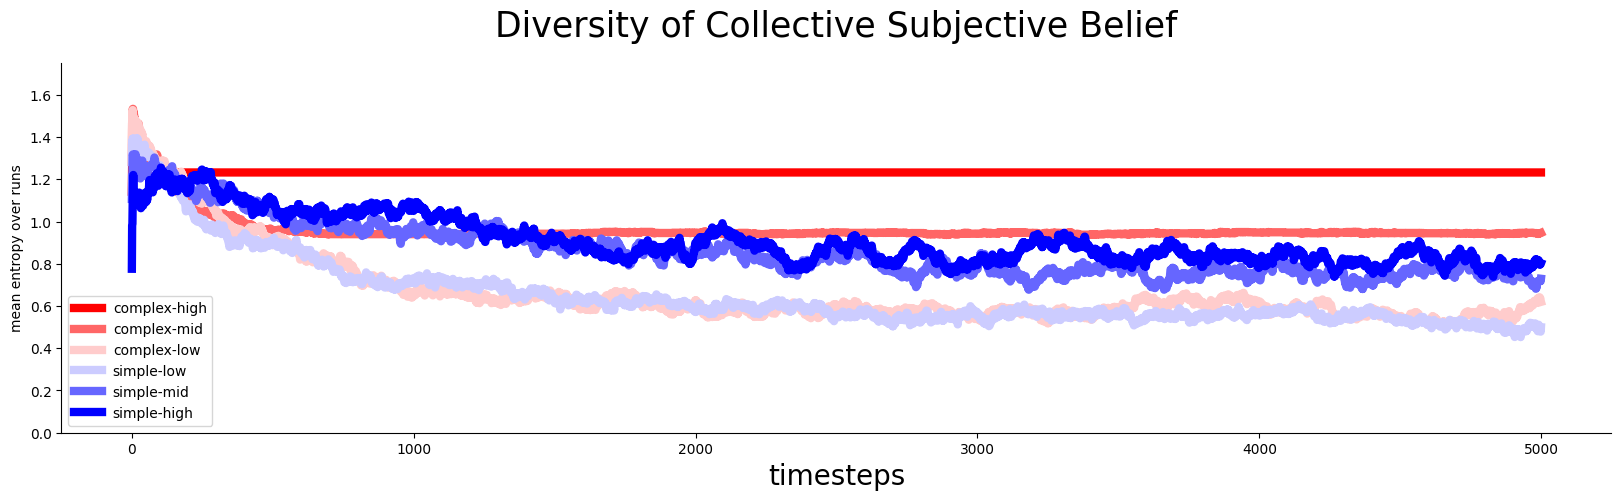

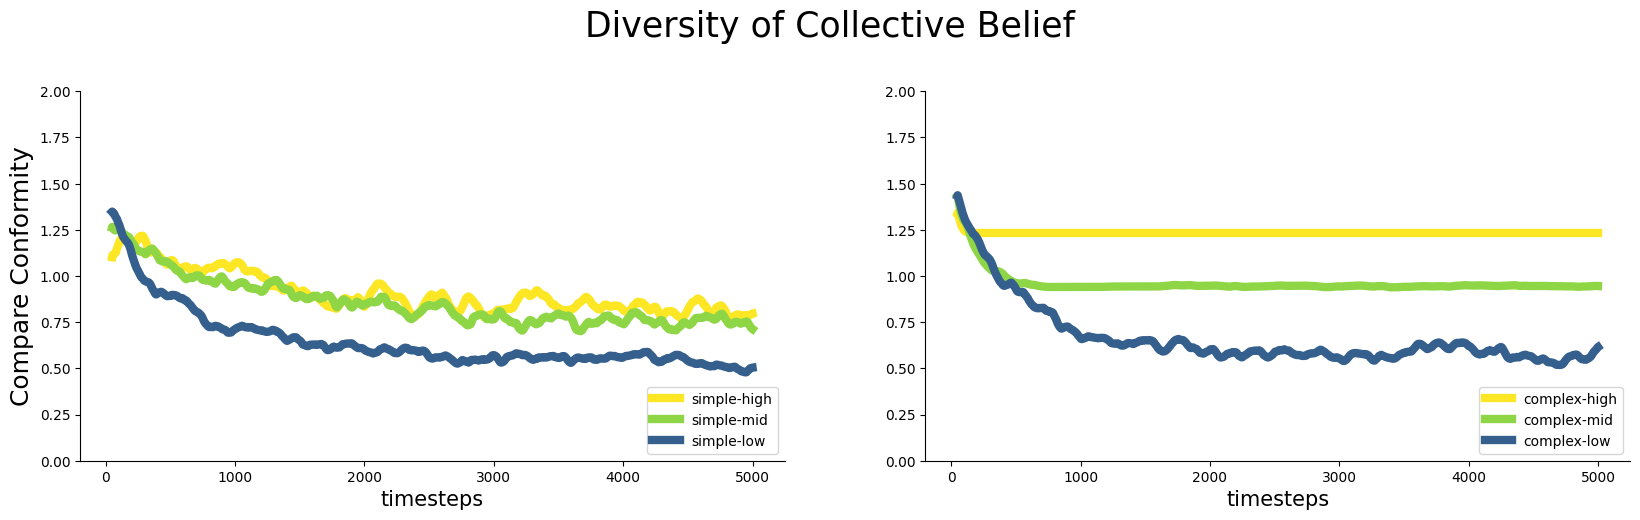

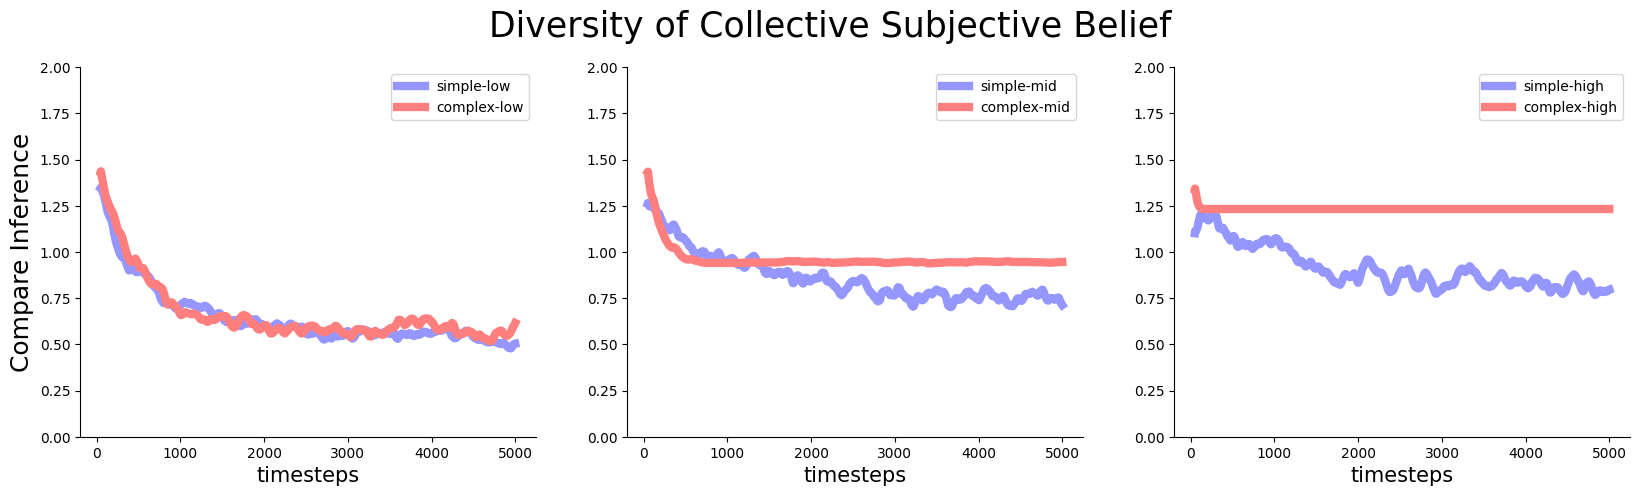

In [77]:
cmap = cm.get_cmap("bwr")
fig, ax = plt.subplots()
plt.ylim(0,1.75)
fig.set_figwidth(20)
plt.title("Diversity of Collective Subjective Belief", fontsize=25, y = 1.05)
plt.ylabel("mean entropy over runs", fontsize = 10)
plt.xlabel("timesteps", fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(pd.DataFrame(np.transpose(ent_cb180)).mean(axis=1), color = cmap(1.2), linewidth = 6, alpha = 1, label = 'complex-high')
plt.plot(pd.DataFrame(np.transpose(ent_cb150)).mean(axis=1), color = cmap(.8), linewidth = 6, alpha = 1, label = 'complex-mid')
plt.plot(pd.DataFrame(np.transpose(ent_cb120)).mean(axis=1), color = cmap(.6), linewidth = 6, alpha = 1, label = 'complex-low')

plt.plot(pd.DataFrame(np.transpose(ent_cb020)).mean(axis=1), color = cmap(.4), linewidth = 6, alpha = 1, label = 'simple-low')
plt.plot(pd.DataFrame(np.transpose(ent_cb050)).mean(axis=1), color = cmap(.2), linewidth = 6, alpha = 1, label = 'simple-mid')
plt.plot(pd.DataFrame(np.transpose(ent_cb080)).mean(axis=1), color = cmap(0), linewidth = 6, alpha = 1, label = 'simple-high')

plt.legend()
plt.show()

# compare conformity
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)
fig.suptitle("Diversity of Collective Belief", fontsize=25, y = 1.05)
ax[0].set_ylabel("Compare Conformity", fontsize = 18)
ax[0].set_xlabel("timesteps", fontsize = 15)
ax[1].set_xlabel("timesteps", fontsize = 15)
ax[1].plot(pd.DataFrame(np.transpose(ent_cb180)).mean(axis = 1).rolling(50).mean(), color = colors2[2], linewidth = 6, alpha = 1, label = 'complex-high')
ax[1].plot(pd.DataFrame(np.transpose(ent_cb150)).mean(axis = 1).rolling(50).mean(), color = colors2[1], linewidth = 6, alpha = 1, label = 'complex-mid')
ax[1].plot(pd.DataFrame(np.transpose(ent_cb120)).mean(axis = 1).rolling(50).mean(), color = colors2[0], linewidth = 6, alpha = 1, label = 'complex-low')
ax[0].plot(pd.DataFrame(np.transpose(ent_cb080)).mean(axis = 1).rolling(50).mean(), color = colors2[2], linewidth = 6, alpha = 1, label = 'simple-high')
ax[0].plot(pd.DataFrame(np.transpose(ent_cb050)).mean(axis = 1).rolling(50).mean(), color = colors2[1], linewidth = 6, alpha = 1, label = 'simple-mid')
ax[0].plot(pd.DataFrame(np.transpose(ent_cb020)).mean(axis = 1).rolling(50).mean(), color = colors2[0], linewidth = 6, alpha = 1, label = 'simple-low')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.legend(loc='lower right')
    a.set_ylim(0,2)
    # a.grid(True)
    
plt.show()


#compare tom
fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.suptitle("Diversity of Collective Subjective Belief", fontsize=25, y = 1)
ax[0].set_ylabel("Compare Inference", fontsize = 18)
ax[0].set_xlabel("timesteps", fontsize = 15)
ax[1].set_xlabel("timesteps", fontsize = 15)
ax[2].set_xlabel("timesteps", fontsize = 15)
ax[0].plot(pd.DataFrame(np.transpose(ent_cb020)).mean(axis = 1).rolling(50).mean(), linewidth = 6, color = colors1[0], alpha = 1, label = 'simple-low')
ax[0].plot(pd.DataFrame(np.transpose(ent_cb120)).mean(axis = 1).rolling(50).mean(), linewidth = 6, color = colors1[1], alpha = 1, label = 'complex-low')
ax[1].plot(pd.DataFrame(np.transpose(ent_cb050)).mean(axis = 1).rolling(50).mean(), linewidth = 6, color = colors1[0], alpha = 1, label = 'simple-mid')
ax[1].plot(pd.DataFrame(np.transpose(ent_cb150)).mean(axis = 1).rolling(50).mean(), linewidth = 6, color = colors1[1], alpha = 1, label = 'complex-mid')
ax[2].plot(pd.DataFrame(np.transpose(ent_cb080)).mean(axis = 1).rolling(50).mean(), linewidth = 6, color = colors1[0], alpha = 1, label = 'simple-high')
ax[2].plot(pd.DataFrame(np.transpose(ent_cb180)).mean(axis = 1).rolling(50).mean(), linewidth = 6, color = colors1[1], alpha = 1, label = 'complex-high')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.legend(loc='upper right')
    a.set_ylim(0,2)
    # a.grid(True)
plt.show()


## Collective Behaviour Entropy

In [12]:
df_ColAction = pd.DataFrame() 

In [13]:
df_ColAction['simple-high'] = pd.DataFrame(np.transpose(ent_cn080)).mean(axis = 1)
df_ColAction['simple-mid'] = pd.DataFrame(np.transpose(ent_cn050)).mean(axis = 1)
df_ColAction['simple-low'] = pd.DataFrame(np.transpose(ent_cn020)).mean(axis = 1)
df_ColAction['complex-low'] = pd.DataFrame(np.transpose(ent_cn120)).mean(axis = 1)
df_ColAction['complex-mid'] = pd.DataFrame(np.transpose(ent_cn150)).mean(axis = 1)
df_ColAction['complex-high'] = pd.DataFrame(np.transpose(ent_cn180)).mean(axis = 1)
#'simple-mid': ent_cn050, 'simple-low': ent_cn020, 'complex-low': ent_cn120, 'complex-mid': ent_cn150, 'complex-high': ent_cn180}

<AxesSubplot:title={'center':'Collective Behaviour Entropy in violinplot'}>

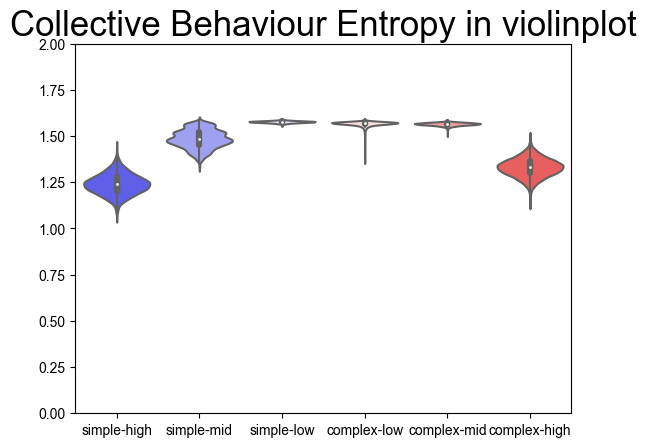

In [14]:
plt.title('Collective Behaviour Entropy in violinplot', size=25)
sns.set(rc={'figure.figsize':(8,7)})
plt.ylim(0,2)
sns.violinplot(data= df_ColAction[['simple-high', 'simple-mid', 'simple-low', 'complex-low', 'complex-mid', 'complex-high']], scale='width', inner='box', palette="bwr")

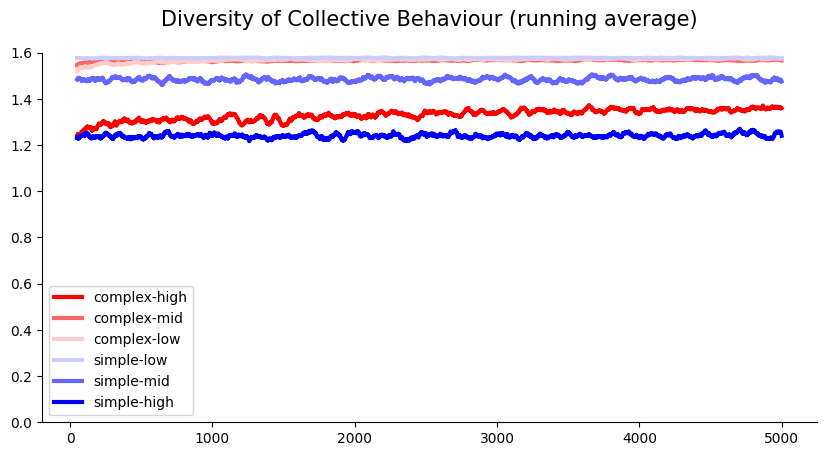

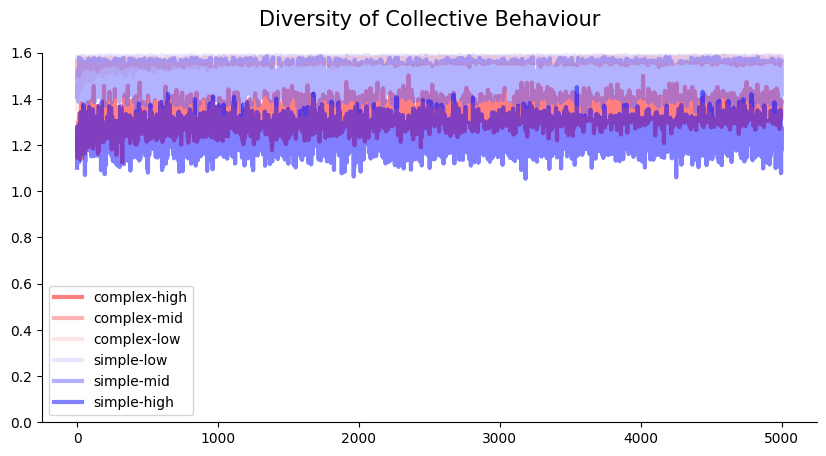

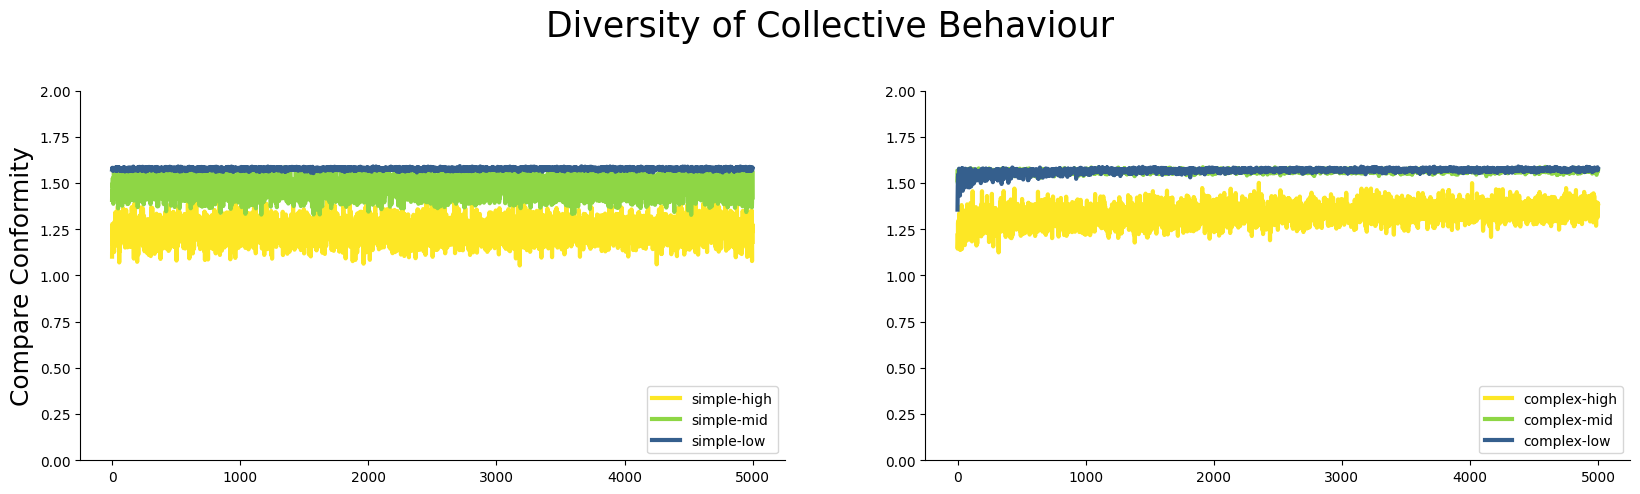

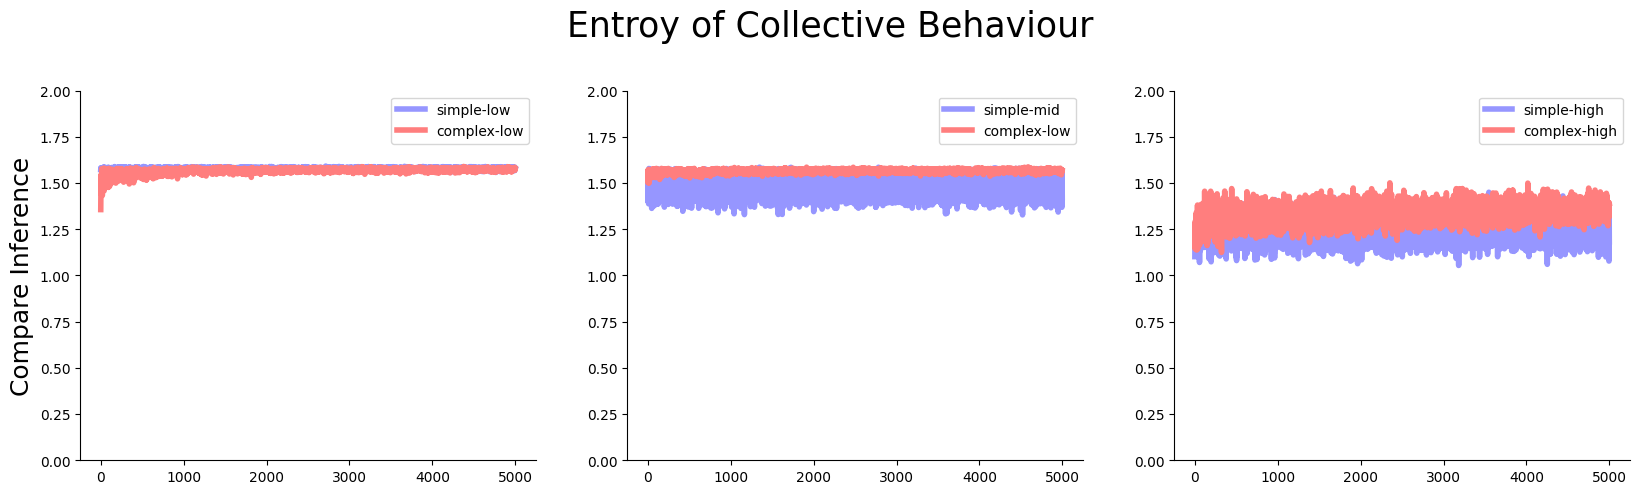

In [15]:
##import matplotlib
matplotlib.rc_file_defaults()
cmap = cm.get_cmap("bwr")
fig, ax = plt.subplots()
fig.set_figwidth(10)
plt.ylim(0,1.6)
plt.title("Diversity of Collective Behaviour (running average)", fontsize=15, y = 1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(pd.DataFrame(np.transpose(ent_cn180)).mean(axis = 1).rolling(50).mean(), color = cmap(1.), linewidth = 3, alpha = 1, label = 'complex-high')
plt.plot(pd.DataFrame(np.transpose(ent_cn150)).mean(axis = 1).rolling(50).mean(), color = cmap(.8), linewidth = 3, alpha = 1, label = 'complex-mid')
plt.plot(pd.DataFrame(np.transpose(ent_cn120)).mean(axis = 1).rolling(50).mean(), color = cmap(.6), linewidth = 3, alpha = 1, label = 'complex-low')

plt.plot(pd.DataFrame(np.transpose(ent_cn020)).mean(axis = 1).rolling(50).mean(), color = cmap(.4),  linewidth = 3, alpha = 1, label = 'simple-low')
plt.plot(pd.DataFrame(np.transpose(ent_cn050)).mean(axis = 1).rolling(50).mean(), color = cmap(.2), linewidth = 3, alpha = 1, label = 'simple-mid')
plt.plot(pd.DataFrame(np.transpose(ent_cn080)).mean(axis = 1).rolling(50).mean(), color = cmap(0), linewidth = 3, alpha = 1, label = 'simple-high')

plt.legend()
ax.legend(loc='lower left')
plt.show()

fig, ax = plt.subplots()
fig.set_figwidth(10)
plt.ylim(0,1.6)
plt.title("Diversity of Collective Behaviour", fontsize=15, y = 1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(pd.DataFrame(np.transpose(ent_cn180)).mean(axis = 1), color = cmap(1.), linewidth = 3, alpha = .5, label = 'complex-high')
plt.plot(pd.DataFrame(np.transpose(ent_cn150)).mean(axis = 1), color = cmap(.8), linewidth = 3, alpha = .5, label = 'complex-mid')
plt.plot(pd.DataFrame(np.transpose(ent_cn120)).mean(axis = 1), color = cmap(.6), linewidth = 3, alpha = .5, label = 'complex-low')

plt.plot(pd.DataFrame(np.transpose(ent_cn020)).mean(axis = 1), color = cmap(.4), linewidth = 3, alpha = .5, label = 'simple-low')
plt.plot(pd.DataFrame(np.transpose(ent_cn050)).mean(axis = 1), color = cmap(.2), linewidth = 3, alpha = .5, label = 'simple-mid')
plt.plot(pd.DataFrame(np.transpose(ent_cn080)).mean(axis = 1), color = cmap(0), linewidth = 3, alpha = .5, label = 'simple-high')


plt.legend()
ax.legend(loc='lower left')
plt.show()

# compare conformity
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)
fig.suptitle("Diversity of Collective Behaviour", fontsize=25, y = 1.05)
ax[0].set_ylabel("Compare Conformity", fontsize = 18)

ax[1].plot(pd.DataFrame(np.transpose(ent_cn180)).mean(axis = 1), color = colors2[2], linewidth = 3, alpha = 1, label = 'complex-high')
ax[1].plot(pd.DataFrame(np.transpose(ent_cn150)).mean(axis = 1), color = colors2[1], linewidth = 3, alpha = 1, label = 'complex-mid')
ax[1].plot(pd.DataFrame(np.transpose(ent_cn120)).mean(axis = 1), color = colors2[0], linewidth = 3, alpha = 1, label = 'complex-low')

ax[0].plot(pd.DataFrame(np.transpose(ent_cn080)).mean(axis = 1), color = colors2[2], linewidth = 3, alpha = 1, label = 'simple-high')
ax[0].plot(pd.DataFrame(np.transpose(ent_cn050)).mean(axis = 1), color = colors2[1], linewidth = 3, alpha = 1, label = 'simple-mid')
ax[0].plot(pd.DataFrame(np.transpose(ent_cn020)).mean(axis = 1), color = colors2[0], linewidth = 3, alpha = 1, label = 'simple-low')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.legend(loc='lower right')
    a.set_ylim(0,2)

plt.show()

#compare tom
fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.suptitle("Entroy of Collective Behaviour", fontsize=25, y = 1.05)
ax[0].set_ylabel("Compare Inference", fontsize = 18)

ax[0].plot(pd.DataFrame(np.transpose(ent_cn020)).mean(axis = 1), linewidth = 4, color = colors1[0], alpha = 1, label = 'simple-low')
ax[0].plot(pd.DataFrame(np.transpose(ent_cn120)).mean(axis = 1), linewidth = 4, color = colors1[1], alpha = 1, label = 'complex-low')
ax[1].plot(pd.DataFrame(np.transpose(ent_cn050)).mean(axis = 1), linewidth = 4, color = colors1[0], alpha = 1, label = 'simple-mid')
ax[1].plot(pd.DataFrame(np.transpose(ent_cn150)).mean(axis = 1), linewidth = 4, color = colors1[1], alpha = 1, label = 'complex-low')
ax[2].plot(pd.DataFrame(np.transpose(ent_cn080)).mean(axis = 1), linewidth = 4, color = colors1[0], alpha = 1, label = 'simple-high')
ax[2].plot(pd.DataFrame(np.transpose(ent_cn180)).mean(axis = 1), linewidth = 4, color = colors1[1], alpha = 1, label = 'complex-high')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.legend(loc='upper right')
    a.set_ylim(0,2)

plt.show()

## Inspect Single Run and Individual Agent

In [70]:
def plot_CN_dominentN_IN(c2, under_cn, cmax):
    '''

    Plot a particular run's collective behaviour and collective action side-by-side 
    If you want to inspect what happened in a particular run
    Plot for per run inspection

    Parameter:
                c2:       a particular run's collective belief in pandas DataFrame 
                under_cn: same run's collective action in pandas DataFrame
                cmax:     max colorbar value
    Call example: 
                plot_CN_dominentN_IN(ColBelief150n18, ColAction150n18, cmax = 0.5)
                meanning: compare collective belief and collective action from condition 150n18 
                          (ToM1, conformity bias = 0.5, fully-connected network, number 18 run)

                If you want a closer look at all runs per condition (larger plot than plot_ColAction_ColBelief()),
                You could call it in a loop:
                list080 contains all runs' names, for example: ['080n0','080n1', '080n2']
                for i in range(runs):
                        exec(f"plot_CN_dominentN_IN({'ColBelief'}{list080[i]}, {'ColAction'}{list080[i]},  cmax = 0.5)")

    Return:
                2 heatmaps size-by-size

    '''
    f, axes = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [5,5], 'height_ratios':[4]})
    f.subplots_adjust(hspace=0.0001, wspace=0.13)
    #axes[0].set_title('Collective + Objective action Norm')
    #axes[1].set_title('Collective + Subjective Dominant Norm')
    subtitle0 = input('Subtitle for 2nd input is: ')
    subtitle1 = input('Subtitle for 1st input is: ')
    axes[0].set_title(subtitle0)
    axes[1].set_title(subtitle1)
    sns.heatmap(ax = axes[0], data = under_cn, cmap = 'viridis', xticklabels = False, cbar = True, vmin = 0,  vmax = cmax)
    sns.heatmap(ax = axes[1], data = c2, cmap = 'viridis', xticklabels = False, yticklabels = False, cbar = True, vmin = 0, vmax = cmax)


def inspection_4agents(agents, mus_str, agent_list):
    '''
    Inspect 4 agents' subjective norm perception heatmaps

    Parameters:
                agents:      a dictionary contains all agents ran in the simulation
                mus_str:     category means in string like ['0.1','0.3','0.5','0.7','0.9']
                agent_list:  4 number smaller than N (number of agent) that represent agent index


    Call example:           
                inspection_4agents(agents180n14, mus_str, [1,24,14,45])

    Return:
                4X4 cube-like heatmaps represent agent's subjective social norm perception change over timesteps
    '''
    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
    axs = [(0,0),(0,1),(1,0),(1,1)]
    for i in range(4):
        cur = agent_list[i]
        b = np.transpose(agents[cur].subject_weights)
        b = pd.DataFrame(b, index = mus_str)
        if str(type(agents[cur]).__name__) == 'ToM_1':
            agent_type = 'Complex'
        else:
            agent_type = 'Simple'
        
        if str(agents[cur].bias) == '0.2':
            agent_bias = 'Low'
        elif str(agents[cur].bias) == '0.5':
            agent_bias = 'Mid'
        else:
            agent_bias = 'High'
            
        axes[axs[i]].set_title(agent_type+ '_' + agent_bias+' belongs to group:'+str(agents[cur].group))
        sns.heatmap(ax=axes[axs[i]], data = b, cmap = 'viridis', xticklabels = False, vmax = 1)#vmax = 1 #robust = True
        # print('agent belongs to group:', agents[cur].group, 'this is a', type(agents[cur]).__name__, 'agent')


Subtitle for 2nd input is:  050
Subtitle for 1st input is:  150


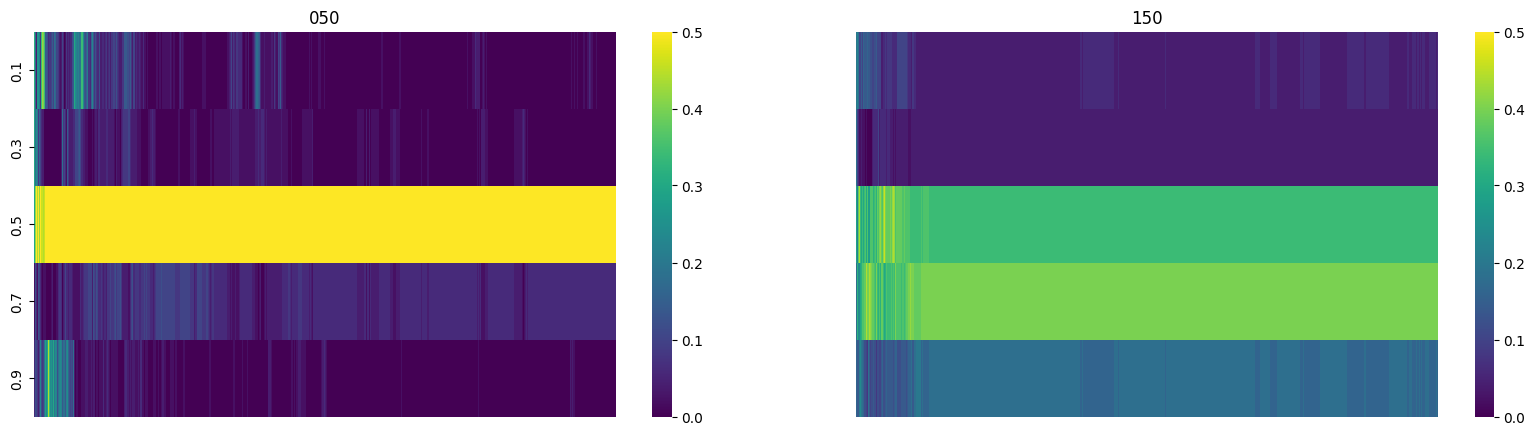

In [17]:
plot_CN_dominentN_IN(ColBelief150n5, ColBelief050n5, cmax = .5)

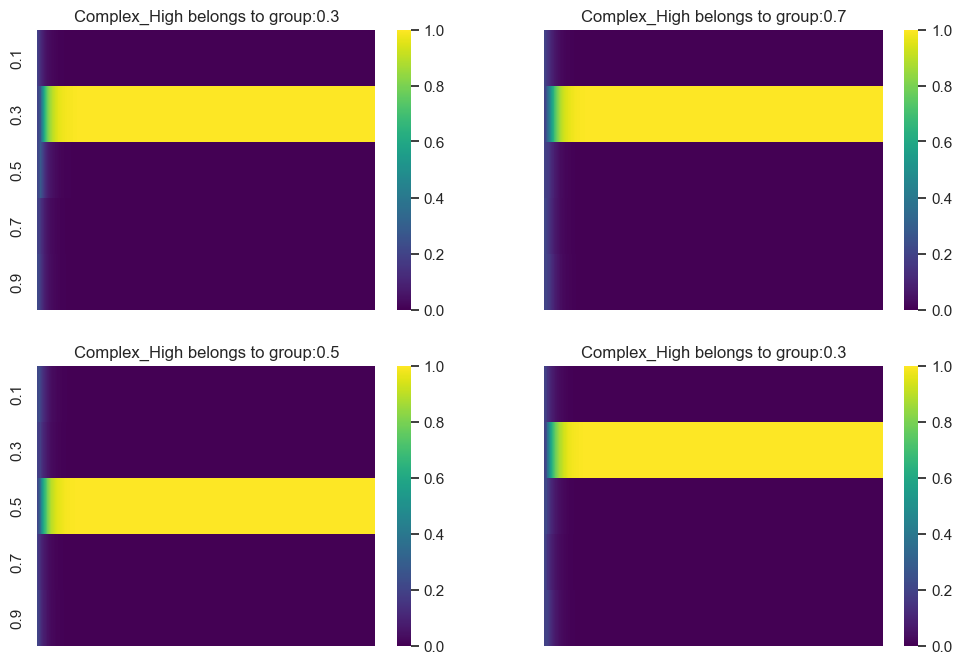

In [72]:
inspection_4agents(agents180n5, mus_str, [1,7,22,32])

## Discrepancy Measures

In [20]:
# create legend
totalListLegend = ['simple-high', 'simple-mid', 'simple-low', 'complex-low', 'complex-mid', 'complex-high']

### Load Plotting Function
(cannot be called from a .py file, idk why)

In [21]:
# Collective-to-Collective Discrepancy Measures we are interested in        
Col_Col = ['ColBelief_IN','ColAction_IN', 'ColAction_ColBelief']
In_Col = ['IndBelief_IN','IndBelief_CN','IndBelief_CB']

In [22]:
def Col_Col_Avg(ColCol, list0, remove):
    '''

    Aggregate a particular Collective-to-Collective measures' for all Runs in one DataFrame
    Then, compute average for all Runs either remove min/max or not

    Parameters:
                ColCol: particular col-to-col measures you want to compute average over all conditions in string
                list0:  the condition you are interested in, like list080
                remove: True or False, Do you want to remove min/max when averaging?

    Call example:
                Col_Col_Avg('ColBelief_IN', list080, remove = True)

    Return:
                a pandas DataFrame with all KLdiv for that measures for that condition in one dataframe
                and their mean
                and the 50 running average of their mean

    '''

    # remove max and min version
    avg_ColCol = pd.DataFrame()
    for i in range(len(list0)):
        exec(f"avg_ColCol['{list0[i][-5:]}'] = {ColCol}{list0[i]}['KLdiv']")
    
    if remove == True:
        arr = avg_ColCol.values
        # Find the indices of the smallest and largest values along each row
        min_indices = np.argmin(arr, axis=1)
        max_indices = np.argmax(arr, axis=1)
        # Create a copy of the array
        arr_copy = np.copy(arr)
        # Set the smallest and largest values to NaN
        arr_copy[np.arange(arr.shape[0]), min_indices] = np.nan
        arr_copy[np.arange(arr.shape[0]), max_indices] = np.nan

        # Calculate the mean along each row, excluding the NaN values
        mean_values = np.nanmean(arr_copy, axis=1)

        avg_ColCol[f"{'mean'}"] = mean_values
    else:
        avg_ColCol[f"{'mean'}"] = avg_ColCol.mean(axis=1)
    
    avg_ColCol['50_rolling_avg'] = avg_ColCol['mean'].rolling(50).mean()
    
    return avg_ColCol


def plot_Col_Col_avg(ColCol, totalList, totalListLegend, ylim, remove, rolling, original):
    '''

    Plot a particular col-to-col measures for all conditions required by totalList

    Parameters:
            ColCol(str):     meansurement name in string
            totalList(list): all conditions interested 
            ylim:            y limit
            remove:          True/False, whether remove min/max when taking average
            rolling:         True/False, show 50-running average
            original:        True/False, show original time series? 

    Call example:
            plot_Col_Col_avg('ColBelief_IN', totalList, ylim=1, remove = True, rolling = True, original = True)

    Return:
            a line plots with different conditions as separate lines.

    '''

    t = which_title(ColCol)
    fig, ax = plt.subplots()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.set_figwidth(15)
    fig.suptitle(t, fontsize = 22)
    # Create a color palette using a blue colormap
    cmap = cm.get_cmap('bwr')
    ax.set_ylim(0,ylim)
    for i in range(len(totalList)):
        color = cmap(i * .2) 
        exec(f"{'Col_Col_avg'}{totalList[i][4:]} = Col_Col_Avg(ColCol, {totalList[i]}, remove)['mean']")
        
        if rolling == True:
            exec(f"ax.plot(Col_Col_Avg(ColCol, {totalList[i]}, remove)['50_rolling_avg'], linewidth = 4, color = color, alpha = 0.9)") #label = totalList[i][4:]
        if original == True:  
            exec(f"ax.plot({'Col_Col_avg'}{totalList[i][4:]}, color = color, alpha = 0.6, label = totalListLegend[i])")
        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()
    
def compare_plot_Col_Col_avg0(ColCol, totalList, totalListLegend, compareCondition, rmTitle, ylim, remove, rolling, origial, colors):
    '''

    Rather than plot all measures for all conditions in 1 plot, 
    this plotting function allows to to plot compared condition side by side

    Parameters:
                ColCol(string):     Any col-to-col measurements you want to plot
                totalList:          Total list of all conditions
                comapreCondition:   "Compare ToM" or "Compare Bias"
                rmTitle:            ?Do you need to removeTitle
                ylim:               set max y value
                remove:             reove mein/max
                rolling:            show 50 running average
                origial:            show original time series
                colors:             choose a color set you like

    Call example:
                compare_plot_Col_Col_avg0(Col_Col[i], tomList[0], "Compare ToM", False, ylim, True, True, True, colors1)
                compare_plot_Col_Col_avg0(Col_Col[i], biasList[0], "Compare bias", False, ylim, True, True, True, colors2)
                where biasList = [[['list020', 'list050', 'list080'], ['list120', 'list150', 'list180']]]
                biasList[0] = [['list020', 'list050', 'list080'], ['list120', 'list150', 'list180']]
                All items in a sub-list will be plot into 1 plot

    Return: 
                Many plots compare by condition required

    '''

    # check list shape
    # row contains data that need to be plot into separate 'row' subplots
    # column contains data that need to be in one subplo
    # therefore, this function can either plot 2 subplots or 3 subplots horizontally
    row = len(totalList)
    column = len(totalList[0])
    
    fig, ax = plt.subplots(1, row)
    fig.set_figwidth(20)
    if rmTitle == False:
        t = which_title(ColCol)
        fig.suptitle(t, fontsize=20)
    # Create a color palette using a viridis colormap
    cmap = cm.get_cmap("viridis")
    # Set y label
    ax[0].set_ylabel(compareCondition, fontsize = 18)
    # for each subplot: remove top and right border lines and set all ylim to be the same
    for r in range(row):
        ax[r].spines['top'].set_visible(False)
        ax[r].spines['right'].set_visible(False)
        ax[r].set_ylim(0,ylim)
        
        # for each data in one subplot
        for i in range(column):
            color = colors[i]
            exec(f"{'ColCol_avg'}{totalList[r][i][4:]} = Col_Col_Avg(ColCol, {totalList[r][i]}, remove)['mean']")
            if rolling == True:
                exec(f"ax[r].plot(Col_Col_Avg(ColCol, {totalList[r][i]}, remove)['50_rolling_avg'], linewidth = 2, color = color, alpha = 1)") # label = totalList[r][i][4:]
            if origial == True:
                exec(f"ax[r].plot({'ColCol_avg'}{totalList[r][i][4:]}, color = color, alpha = .8, linewidth = 2, label = totalListLegend[r][i])")

        ax[r].legend(loc='upper left')

    plt.show()
    
def which_title2(InCol):
    '''

    Generate bold titles for indiviudal-to-collective discrepancy plotting

    Parameters:
                InCol(list): a list of individual to collective measures we want to plot in string
    Return:
                Title in string

    '''

    if InCol == 'IndBelief_IN':
        t = " Discrepancy between " + r"$\bf{"+"Individual \,Subjective \,Belief"+"}$" + " and " + r"$\bf{"+'Initial \,Norm'+"}$"
    elif InCol == 'IndBelief_CN':
        t = " Discrepancy between "+ r"$\bf{"+"Individual \,Subjective \,Belief"+"}$"+ " and " + r"$\bf{"+'Collective \,Action'+"}$"
    elif InCol == 'IndBelief_CB':
        t = " Discrepancy between "+ r"$\bf{"+"Individual \,Subjective \,Belief"+"}$"+ " and " + r"$\bf{"+'Collective \,Belief'+"}$"
        
    return t
   

def plot_In_Col_avg(in_col, totalList, totalListLegend, ylim):
    '''

    Plot a particular in-to-col measures for all conditions required

    Parameters:
            in_col(str):     meansurement name in string 'IndBelief_IN' or 'IndBelief_CN'
            totalList(list): all conditions interested 
            ylim:            y limit

    Call example:
            plot_In_Col_avg(In_Col[0], totalList, ylim = 2.5)

    Return:
            a line plots with all conditions plot in 1 plot

    '''
    t = which_title2(in_col)
    fig, ax = plt.subplots()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.set_figwidth(20)
    fig.suptitle(t, fontsize=22)
    # Create a color palette using a blue colormap
    cmap = cm.get_cmap("bwr")
    ax.set_ylim(0,ylim)
    for i in range(len(totalList)):
        color = cmap(i*.2) 
        exec(f"plot_target = {in_col}{totalList[i][4:]}")
        exec(f"ax.plot(plot_target['mean'], linewidth = 4, color = color, alpha = .8, label = totalListLegend[i])")
        exec(f"ax.fill_between(np.arange(0, steps, 1), plot_target['lower'], plot_target['upper'], color=color, alpha=0.1)")
        
    plt.legend(loc = 'upper left')
    plt.show()


def compare_plot_In_Col_avg0(in_col, totalList, totalListLegend ,compareCondition, ylim, colors):
    '''

    Rather than plot all measures for all conditions in 1 plot, 
    this plotting function allows to to plot compared condition side by side for in-to-col measures

    Parameters:
                in_col(string):     Any col-to-col measurements you want to plot
                totalList:          Total list of all conditions
                comapreCondition:   "Compare ToM" or "Compare Bias"
                ylim:               set max y value
                colors:             choose a color set you like

    Call example:
                compare_plot_In_Col_avg0(In_Col[0], conditionList[0], conditionName, ylim, colors)
                conditionList[0] = [['list020', 'list050', 'list080'], ['list120', 'list150', 'list180']]
                OR something like: [['list020', 'list120'], ['list050', 'list150'], ['list080', 'list180']] when comparing ToM
                Make sure that lines need to be plotted in one figure plot are in 1 sub-list
                conditionName = 'Compare Conformity Bias' OR 'Compare ToM'
                cmap = cm.get_cmap("Spectral")
                colors = [cmap(0.75), cmap(75)]

    Return: 
                Many plots compare by condition required

    '''

    # This function can either plot 2 subplots or 3 subplots horizontally
    row = len(totalList)
    column = len(totalList[0])
    
    fig, ax = plt.subplots(1, row)
    fig.set_figwidth(20)
    # set title
    t = which_title2(in_col)
    fig.suptitle(t, fontsize=20, y = 0.96)
    # Create a color palette using a viridis colormap
    # cmap = cm.get_cmap(colors)
    # Set y label
    fig.text(0.09, 0.5, compareCondition, va='center', rotation='vertical', fontsize = 18)
    
    # for each subplot: remove top and right border lines and set all ylim to be the same
    for r in range(row):
        ax[r].spines['top'].set_visible(False)
        ax[r].spines['right'].set_visible(False)
        ax[r].set_ylim(0,ylim)
       
        for i in range(column):
                color = colors[i]
                exec(f"plot_target = {in_col}{totalList[r][i][4:]}")
                exec(f"ax[r].plot(plot_target['mean'], linewidth = 4, color = color, alpha = 1, label = totalListLegend[r][i])")
                exec(f"ax[r].fill_between(np.arange(0, steps, 1), plot_target['lower'], plot_target['upper'], color=color, alpha=0.1)")

        ax[r].legend(loc='upper left')
            
    plt.show()


### Plot Discrepancy

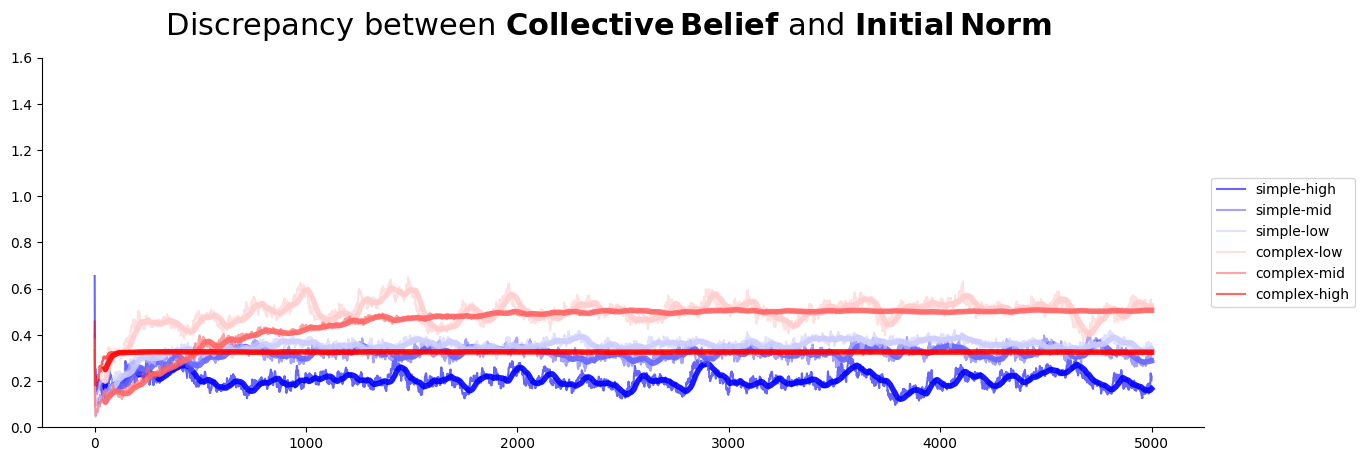

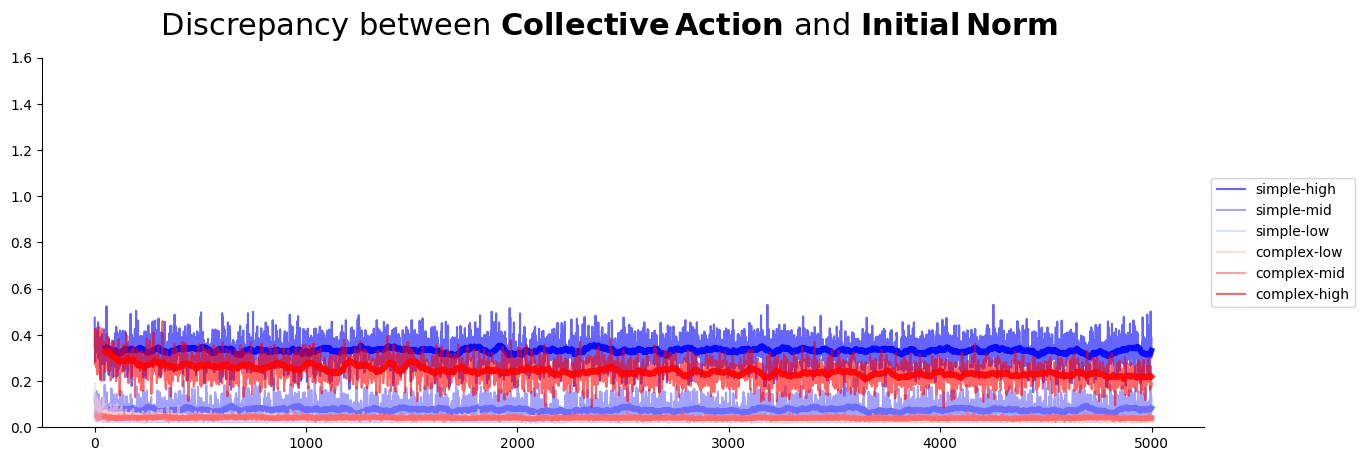

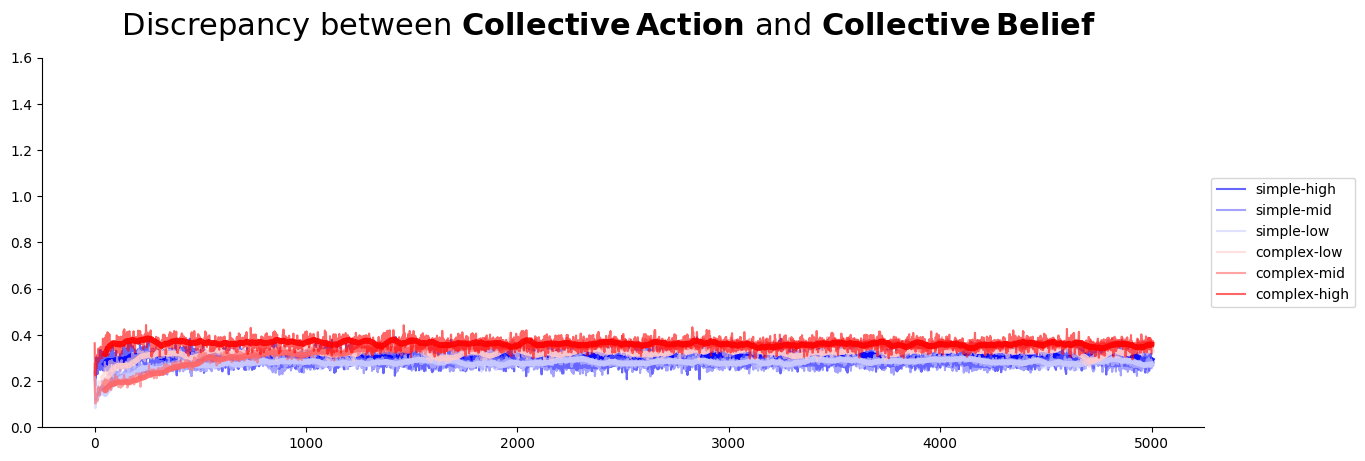

In [27]:
for i in range(len(Col_Col)):
    if i in [0,1]:
        ylim = 1.6 
    elif i == 2:
        ylim = 1.6

    plot_Col_Col_avg(Col_Col[i], totalList, totalListLegend, ylim, remove = True, rolling = True, original = True)

In [28]:
if q_network == '0':
    biasList = [[['list020', 'list050', 'list080'], ['list120', 'list150', 'list180']]]
    biasListLegend =  [[['simple-low', 'simple-mid', 'simple-high'], ['complex-low', 'complex-mid', 'complex-high']]]
    
    tomList = [[['list020', 'list120'], ['list050', 'list150'], ['list080', 'list180']]]
    tomListLegend = [[['simple-low', 'complex-low'], ['simple-mid', 'complex-mid'], ['simple-high', 'complex-high']]]
    
    totalCondition = {'Compare Inference': tomList, 'Compare Conformity': biasList}
    totalConditionName = ['Compare Inference', 'Compare Conformity']
    totalConditionLegend = {'Compare Inference': tomListLegend, 'Compare Conformity': biasListLegend}

elif q_network == '2':
    biasList = [[['list022', 'list052', 'list082'], ['list122', 'list152', 'list182']]]
    biasListLegend =  [[['simple-low', 'simple-mid', 'simple-high'], ['complex-low', 'complex-mid', 'complex-high']]]
    
    tomList = [[['list022', 'list122'], ['list052', 'list152'], ['list082', 'list182']]]
    tomListLegend = [[['simple-low', 'complex-low'], ['simple-mid', 'complex-mid'], ['simple-high', 'complex-high']]]
    
    totalCondition = {'Compare Inference': tomList, 'Compare Conformity': biasList}
    totalConditionLegend = {'Compare Inference': tomListLegend, 'Compare Conformity': biasListLegend}
    
    totalConditionName = ['Compare Inference', 'Compare Conformity']

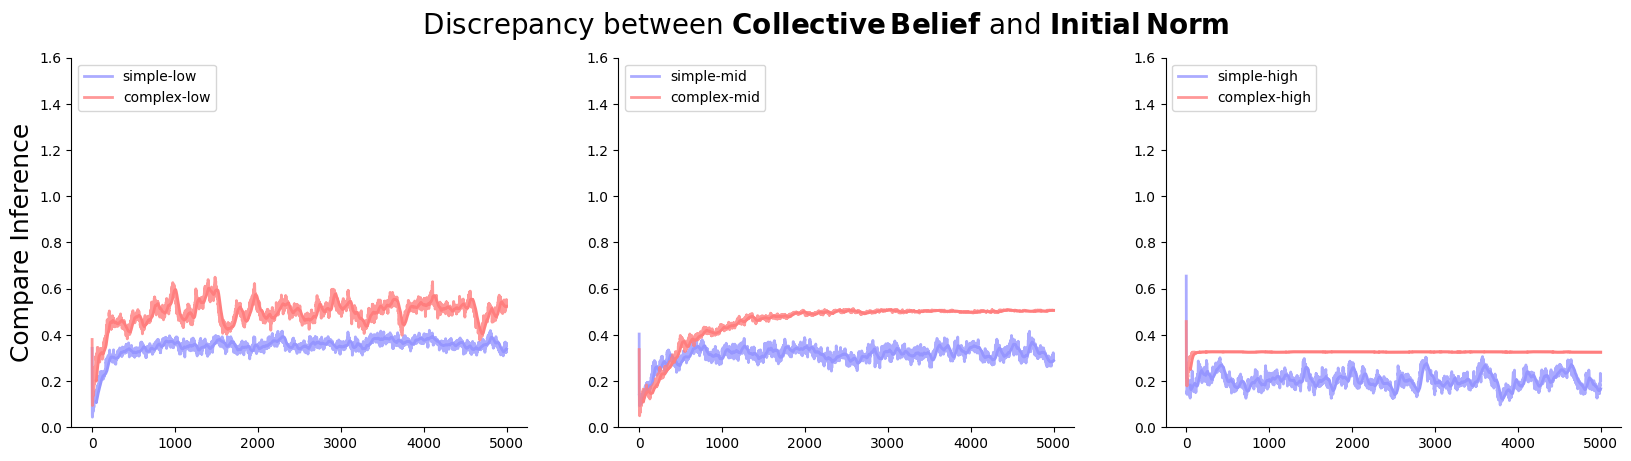

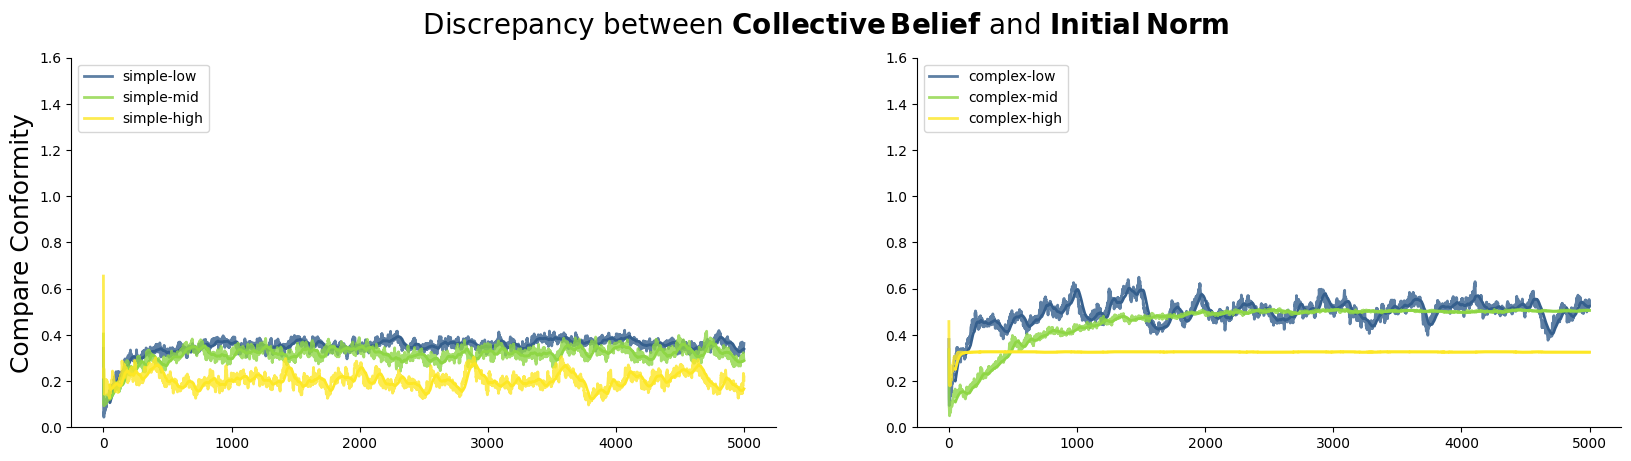

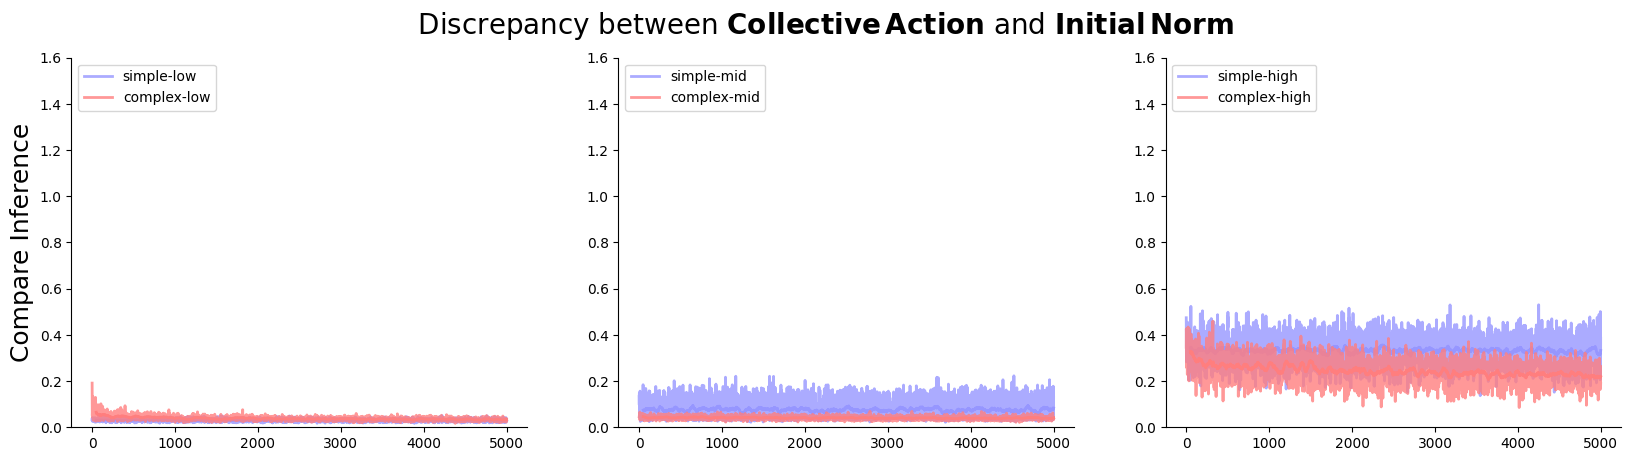

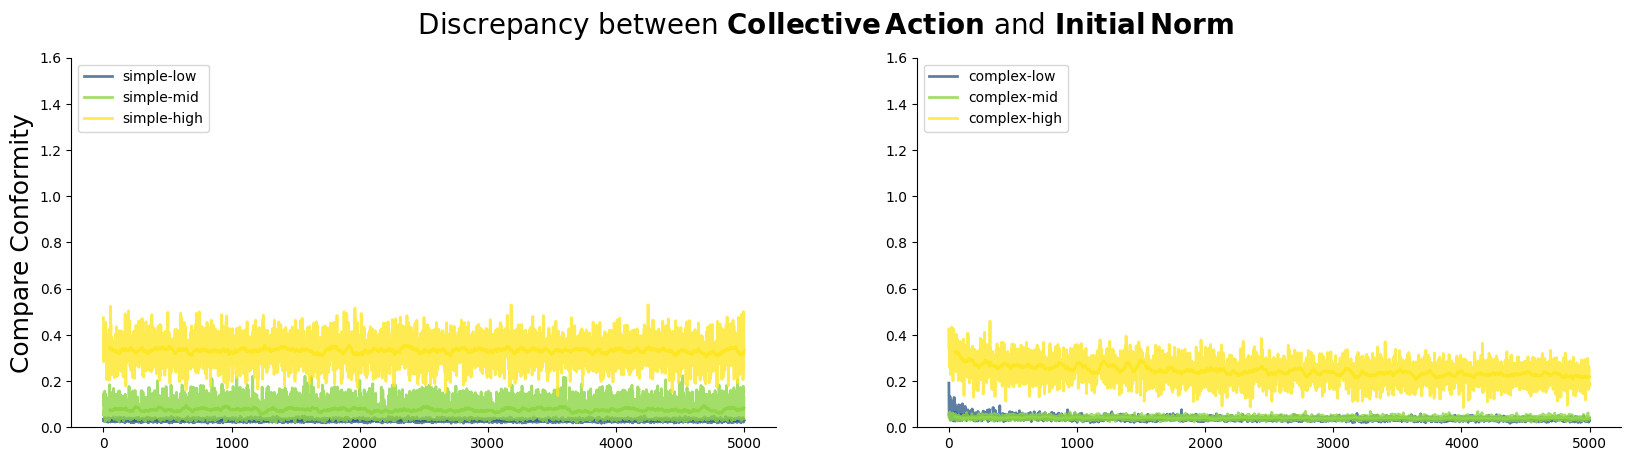

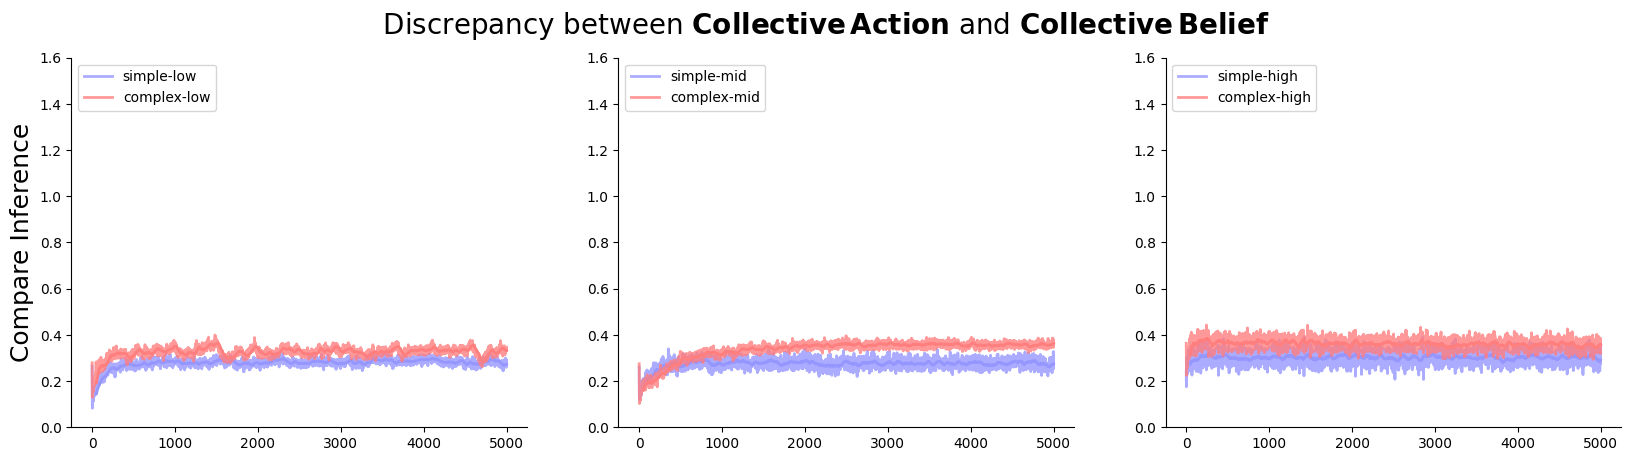

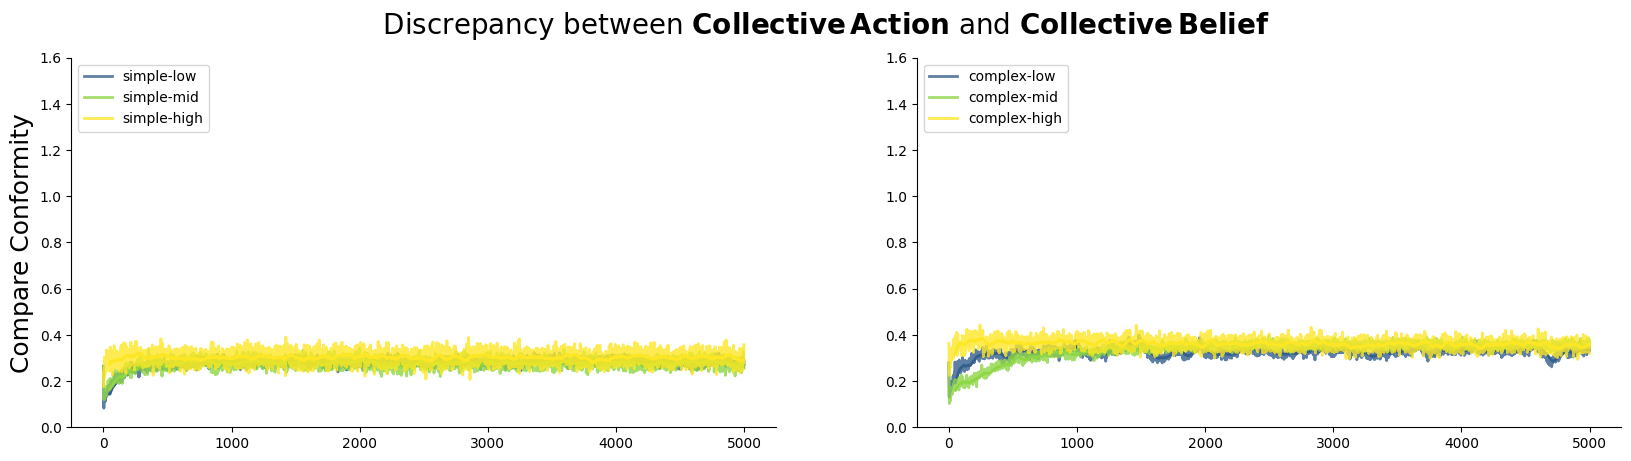

In [29]:
for i in range(len(Col_Col)):
    # plot original or not
    if i in [0,1]:
        ylim = 1.6
    elif i == 2:
        ylim = 1.6
        
    compare_plot_Col_Col_avg0(Col_Col[i], tomList[0], tomListLegend[0], "Compare Inference", False, ylim, True, True, True, colors1)
    compare_plot_Col_Col_avg0(Col_Col[i], biasList[0], biasListLegend[0],"Compare Conformity", False, ylim, True, True, True, colors2)

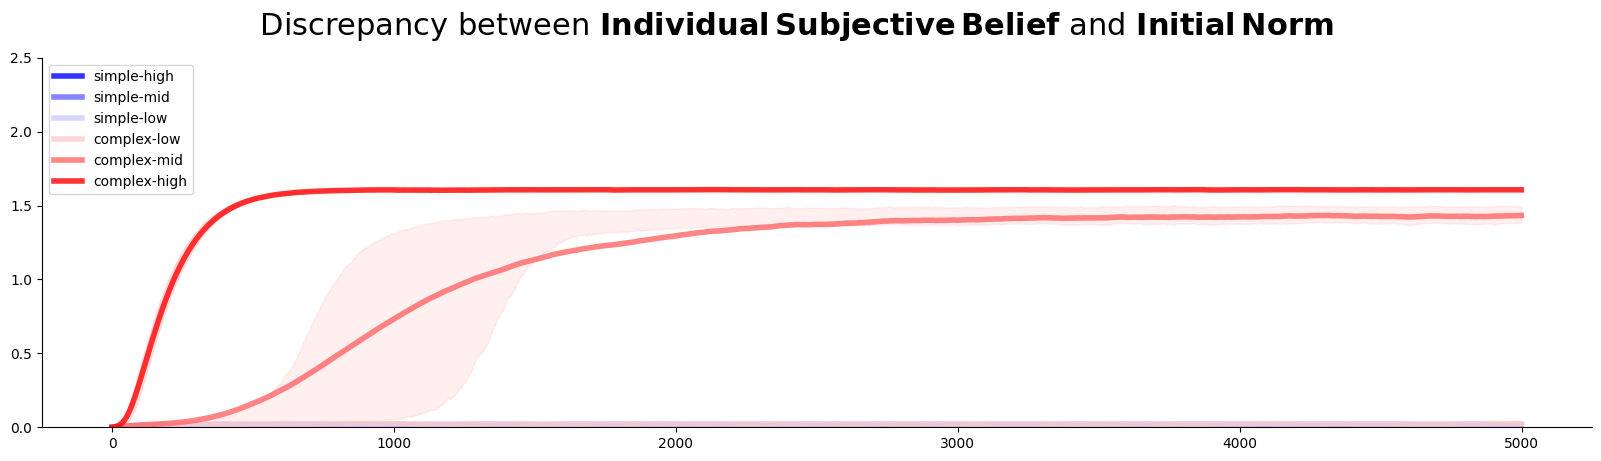

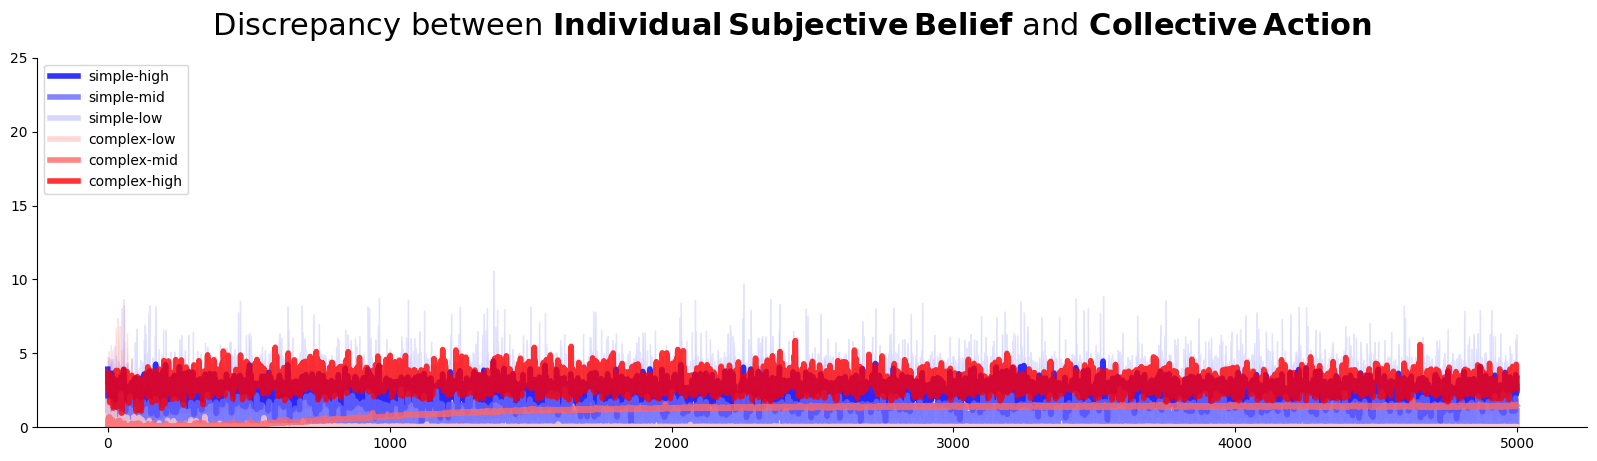

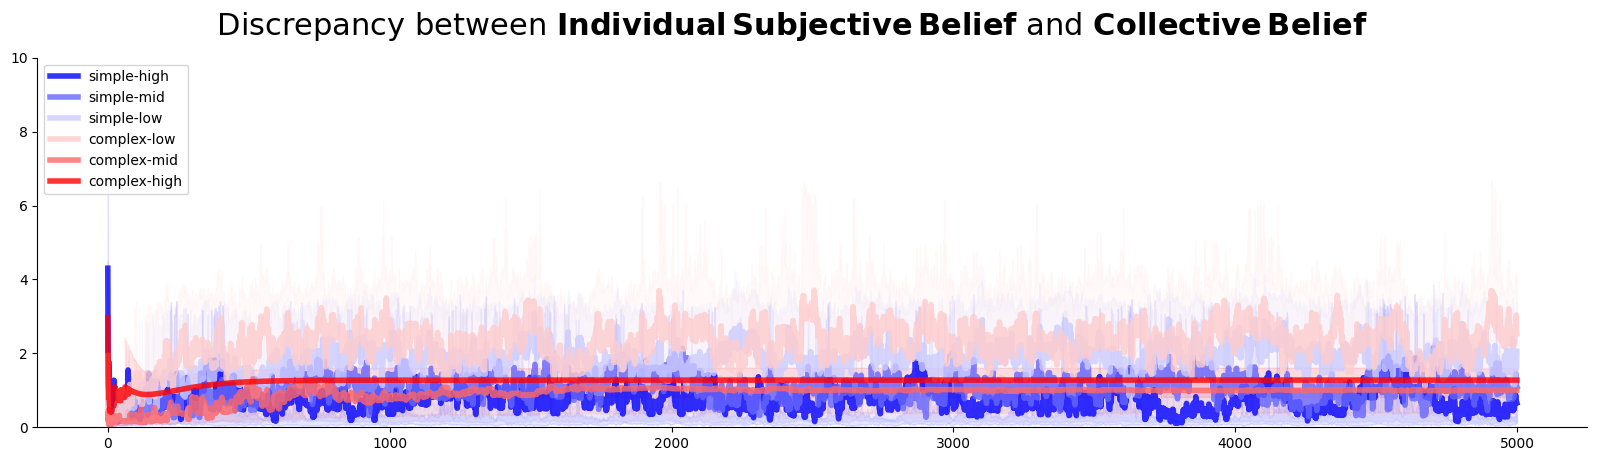

In [30]:
plot_In_Col_avg(In_Col[0], totalList, totalListLegend, ylim = 2.5)
plot_In_Col_avg(In_Col[1], totalList, totalListLegend, ylim = 25)
plot_In_Col_avg(In_Col[2], totalList, totalListLegend, ylim = 10)

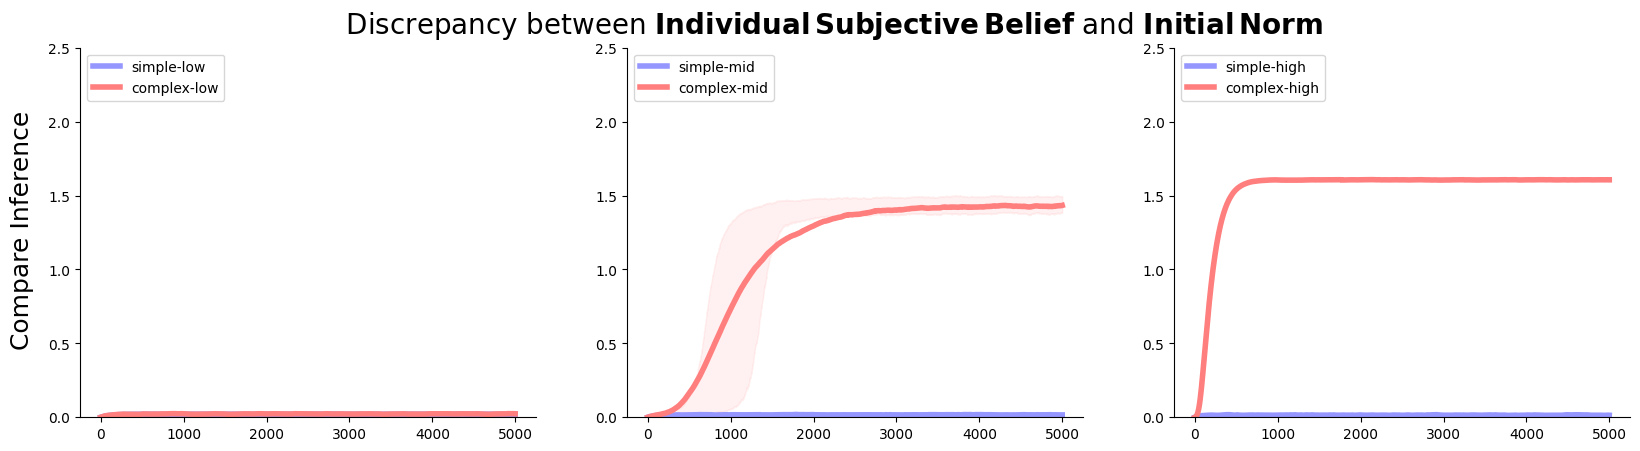

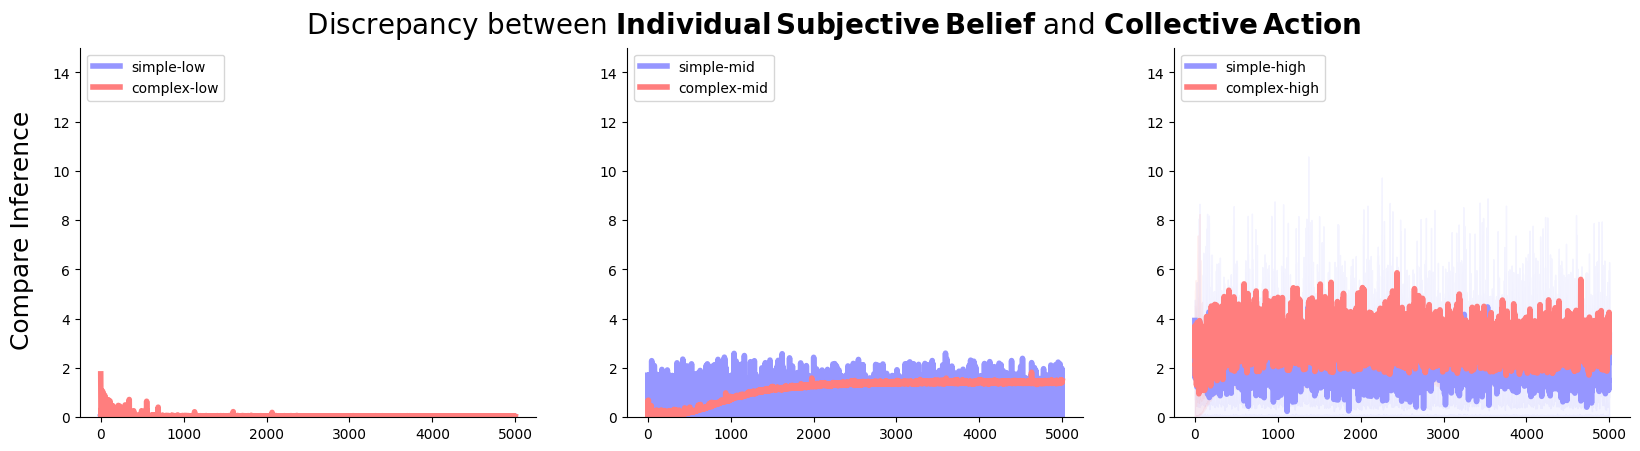

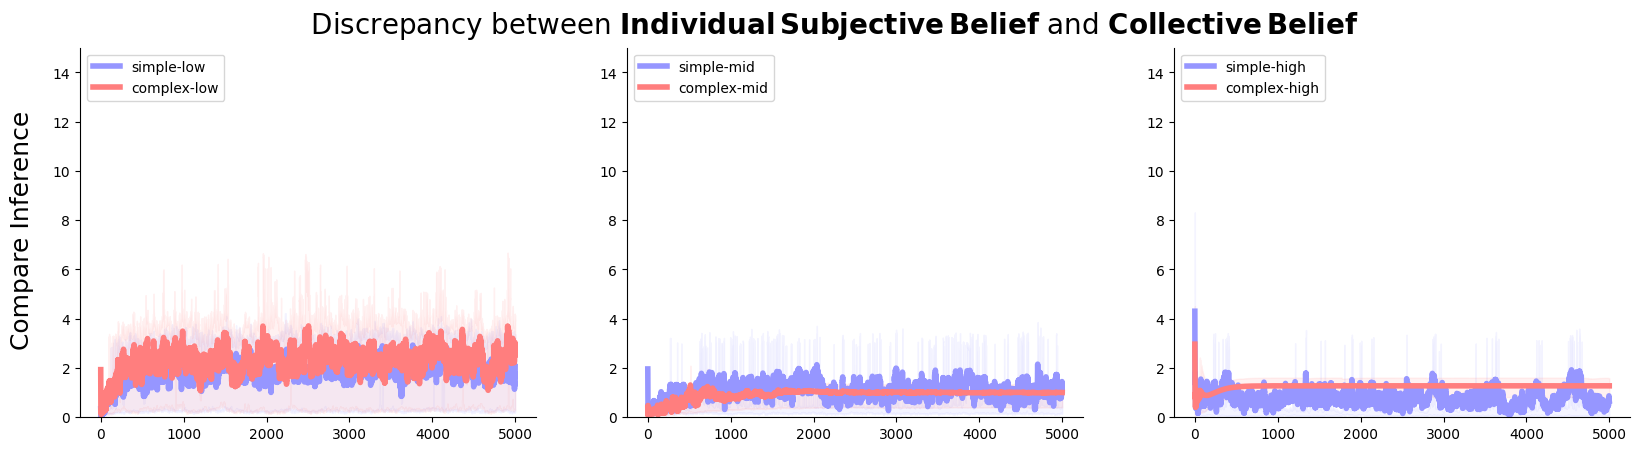

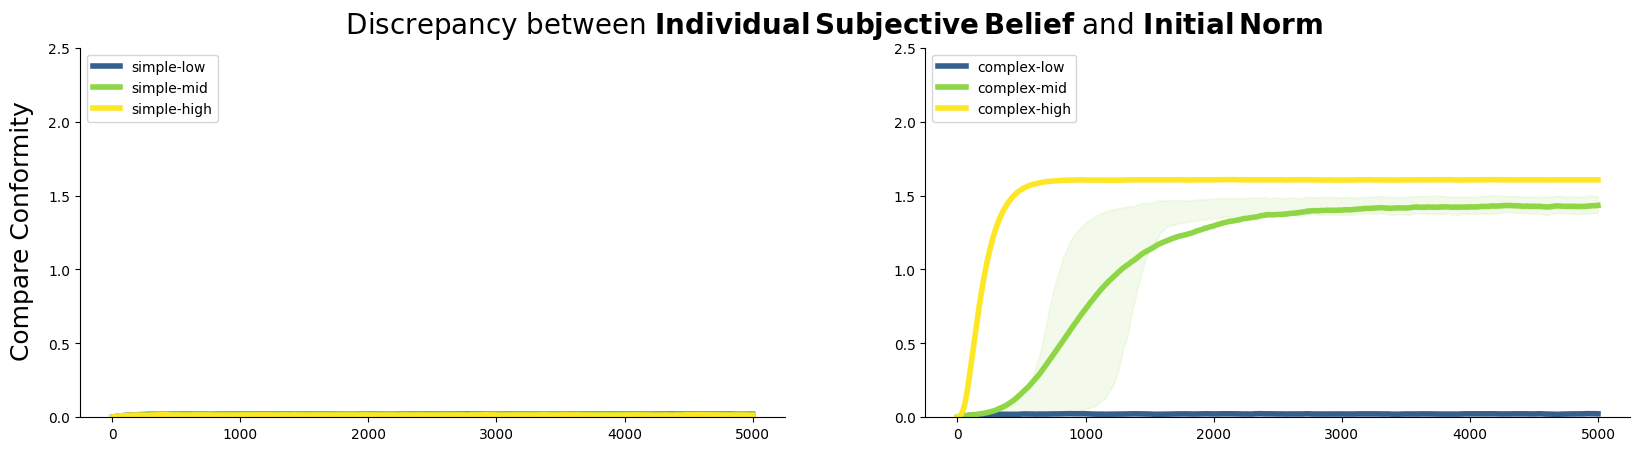

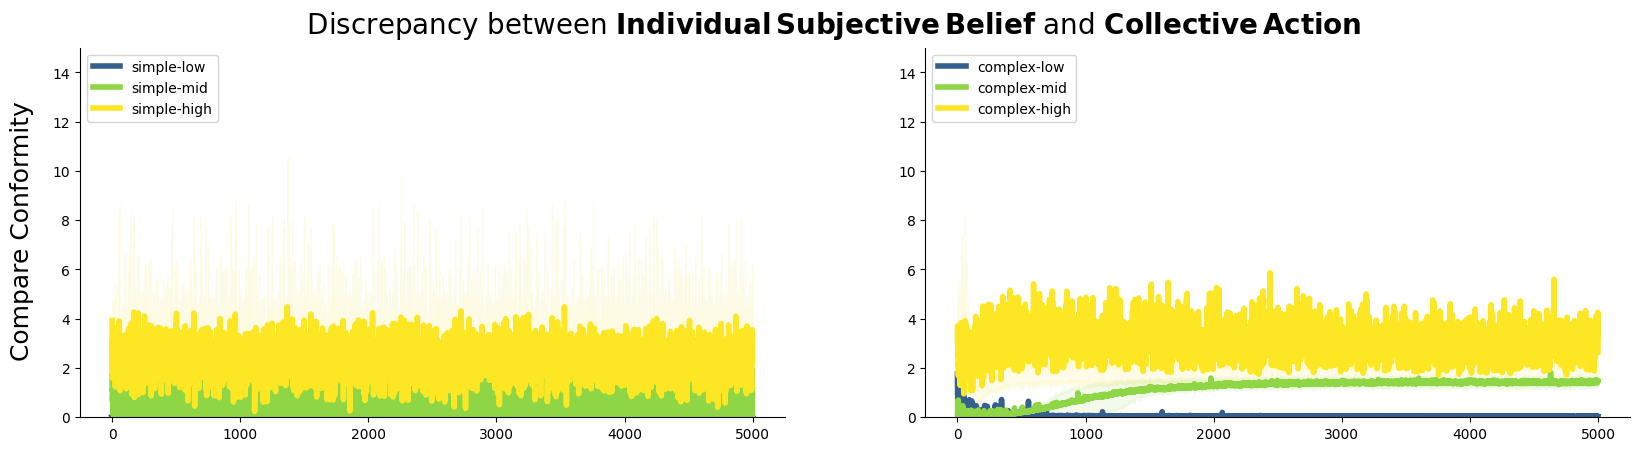

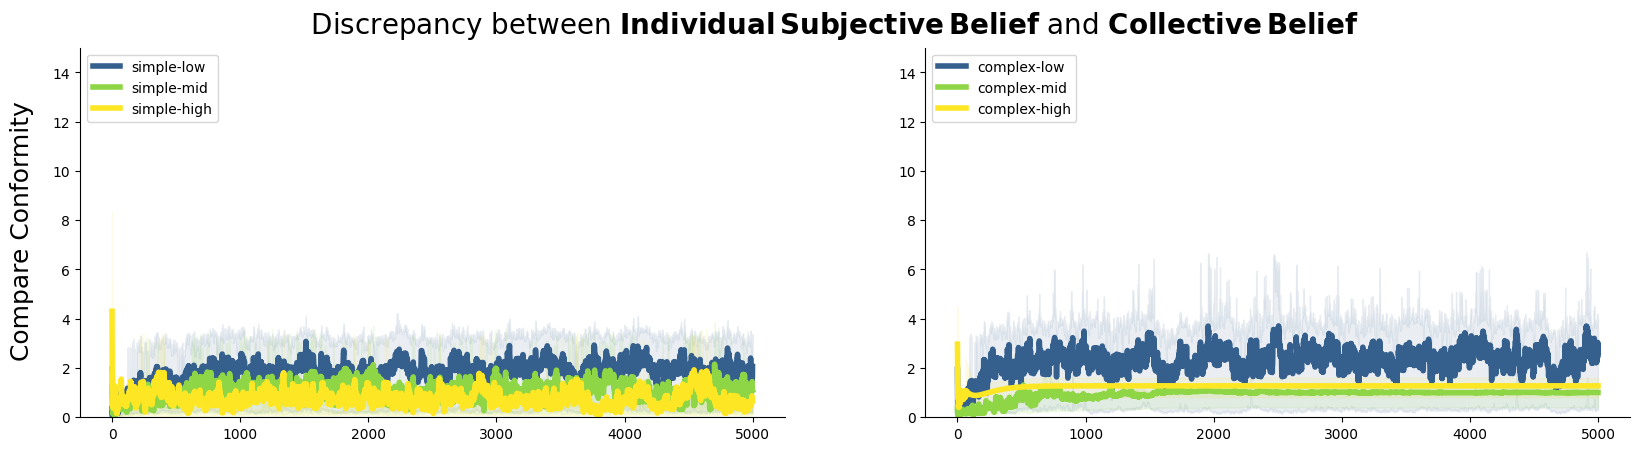

In [31]:
for par in range(2):
    conditionList = totalCondition[totalConditionName[par]]
    conditionListLegend = totalConditionLegend[totalConditionName[par]]
    conditionName = totalConditionName[par]
    colors = colorList[par]
    for measure in range(len(In_Col)):
        if measure == 0:
            ylim = 2.5
        elif measure == 1:
            ylim = 15
        
        compare_plot_In_Col_avg0(In_Col[measure], conditionList[0], conditionListLegend[0], conditionName, ylim, colors)

In [51]:
data_action.keys()

dict_keys(['020', '050', '080', '120', '150', '180'])

In [62]:
new_key_list_action = ['simple-low', 'simple-mid', 'simple-high', 'complex-low', 'complex-mid', 'complex-high']
#new_key_list_action = ['simple-low', 'complex-low', 'simple-mid', 'complex-mid', 'simple-high', 'complex-high']
data_action = dict(zip(new_key_list_action, data_action.values()))
df_action = pd.DataFrame(data_action)

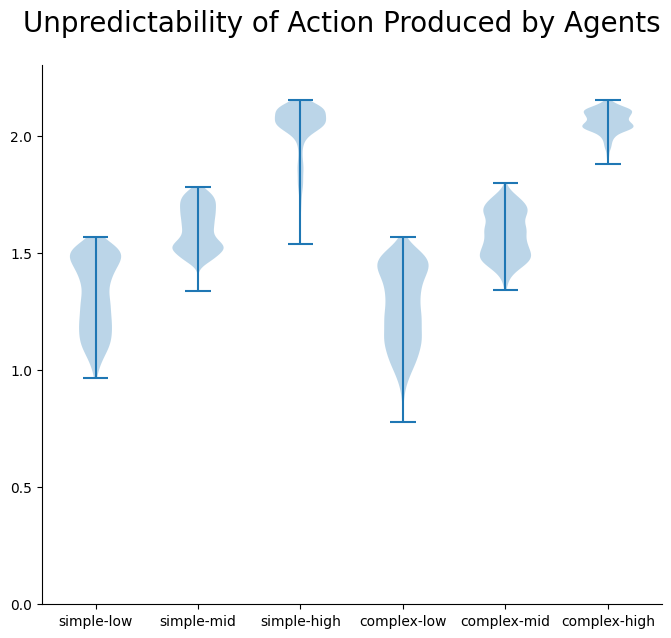

In [74]:
##import matplotlib
matplotlib.rc_file_defaults()
plot_sample_entropy_actions(data_action)

<AxesSubplot:title={'center':'Unpredictability of Action'}>

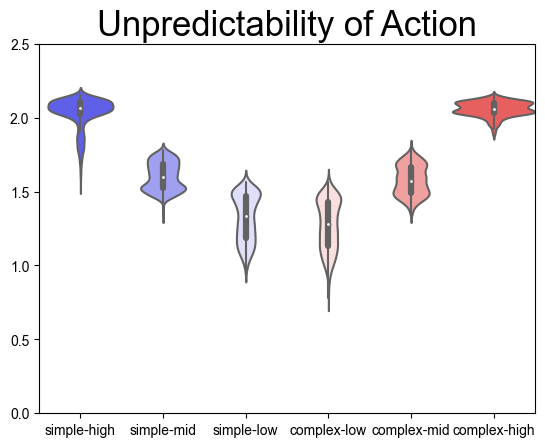

In [54]:
plt.title('Unpredictability of Action', size=25)
sns.set(rc={'figure.figsize':(8,7)})
plt.ylim(0,2.5)
sns.violinplot(data=df_action[['simple-high', 'simple-mid', 'simple-low', 'complex-low', 'complex-mid', 'complex-high']], palette="bwr", width=1, inner="box")

In [60]:
correct.keys()

dict_keys(['correct020', 'correct050', 'correct080', 'correct120', 'correct150', 'correct180'])

In [63]:
#new_key_list_correct = ['simple-high', 'simple-mid', 'simple-low', 'complex-low', 'complex-mid', 'complex-high']
correct = dict(zip(new_key_list_action, correct.values()))
df_ac = pd.DataFrame(correct)

<AxesSubplot:title={'center':'Inference Accuracy'}, xlabel='Conditions', ylabel='inference accuracy'>

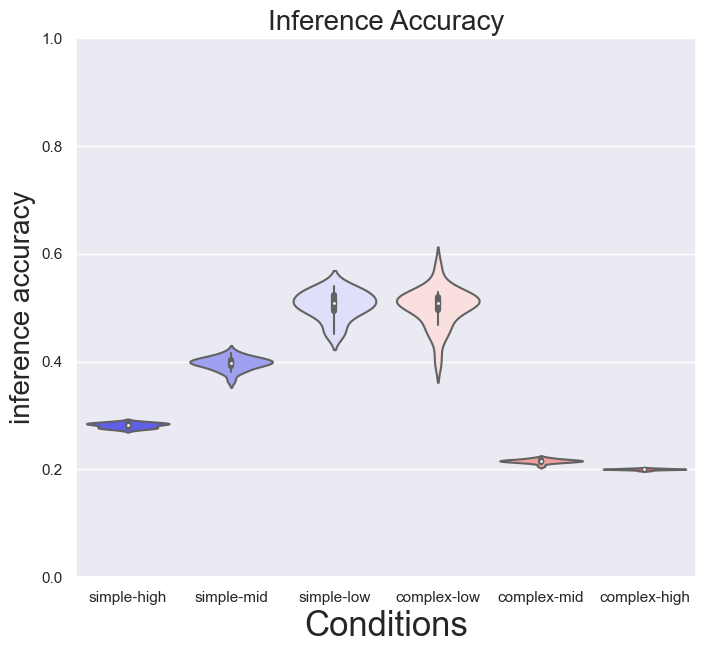

In [69]:
plt.title('Inference Accuracy', size=20)
sns.set(rc={'figure.figsize':(8,7)})
plt.ylabel(r'inference accuracy', size=20)
plt.xlabel(r'Conditions', size=25)
plt.ylim(0, 1)
sns.violinplot(data= df_ac[['simple-high', 'simple-mid', 'simple-low', 'complex-low', 'complex-mid', 'complex-high']], scale='width', inner='box', palette="bwr")

In [54]:
filename == 'agree_collect.pkl'
with open(filepath, 'rb') as file:
    agree_collect = pickle.load(file)

In [56]:
agree_collect.keys()

dict_keys(['bray080', 'bray050', 'bray020', 'bray120', 'bray150', 'bray180'])

In [57]:
new_key_list_correct = ['simple-high', 'simple-mid', 'simple-low', 'complex-low', 'complex-mid', 'complex-high']
agree_collect = dict(zip(new_key_list_correct, correct.values()))
df_agree_collect = pd.DataFrame(agree_collect)

<AxesSubplot:title={'center':'Do individual belief agree with collective belief?'}, ylabel='Agree $\\rightarrow$ Disagree'>

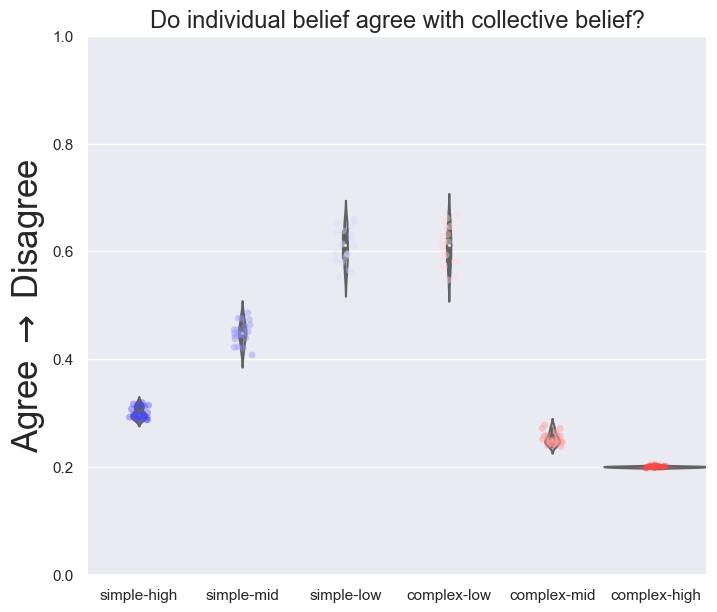

In [58]:
plt.title('Do individual belief agree with collective belief?', size=17)
plt.ylabel(r'Agree $\rightarrow$ Disagree', size=25)
sns.set(rc={'figure.figsize':(8,7)})
plt.ylim(0, 1)
sns.violinplot(data=df_agree_collect[['simple-high', 'simple-mid', 'simple-low', 'complex-low', 'complex-mid', 'complex-high']], palette="bwr", width=1, inner="box")

# Add in points to show each observation
sns.stripplot(data = df_agree_collect[['simple-high', 'simple-mid', 'simple-low', 'complex-low', 'complex-mid', 'complex-high']],
              size=5, palette="bwr", linewidth=0, alpha = .4)

## Agreeableness

In [32]:
harmony.keys()
harmony= dict(zip(new_key_list_correct, harmony.values()))
df_harmony = pd.DataFrame(harmony)

In [36]:
df_harmony = harmony

In [45]:
df_harmony = pd.DataFrame(harmony)

<AxesSubplot:title={'center':'Do they align with each other?'}, ylabel='Align $\\rightarrow$ Misalign'>

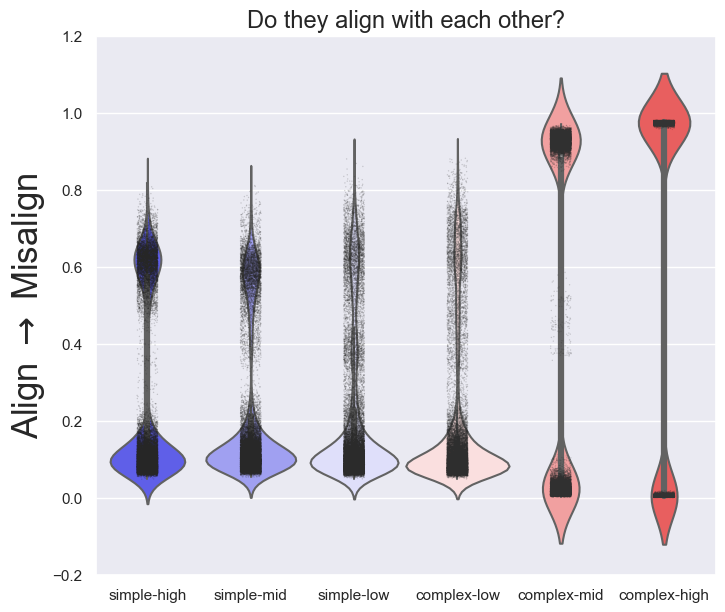

In [46]:
plt.title('Do they align with each other?', size=17)
plt.ylabel(r'Align $\rightarrow$ Misalign', size=25)
sns.set(rc={'figure.figsize':(8,7)})
plt.ylim(-0.2, 1.2)
sns.violinplot(data=df_harmony[['simple-high', 'simple-mid', 'simple-low', 'complex-low', 'complex-mid', 'complex-high']], palette="bwr", width=1, inner="box")

# Add in points to show each observation
sns.stripplot(data = df_harmony[['simple-high', 'simple-mid', 'simple-low', 'complex-low', 'complex-mid', 'complex-high']],
              size=1, color = ".2", linewidth=0, alpha = .2)